___

<p style="text-align: center;"><img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531152877/Employee_Churn_Analysis_hzdqx0.png" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
%matplotlib inline
from ipywidgets import interact
import plotly.io as pio


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import PrecisionRecallCurve, ClassPredictionError
from sklearn.neighbors import KNeighborsClassifier, BallTree
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import pickle
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [290]:
df0 = pd.read_csv("HR_Dataset.csv")
df = df0.copy()
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [291]:
df.columns = df.columns.str.lower().str.strip()

In [292]:
df.isna().sum() # no null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [293]:
df.duplicated().sum()

3008

In [294]:
df.drop_duplicates(inplace=True)

In [295]:
df.shape

(11991, 10)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [297]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
work_accident              2
left                       2
promotion_last_5years      2
departments               10
salary                     3
dtype: int64

In [298]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_5years'], float64: ['satisfaction_level', 'last_evaluation'], object: ['departments', 'salary']}

In [299]:
# move 'left' column to end

column_to_move = df.pop("left")
df["left"] = column_to_move
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      0       sales   
2                   4              0                      0       sales   
3                   5              0                      0       sales   
4                   3              0                      0       sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [300]:
df.describe().T

count        mean        std    min     25%     50%  \
satisfaction_level     11991.0    0.629658   0.241070   0.09    0.48    0.66   
last_evaluation        11991.0    0.716683   0.168343   0.36    0.57    0.72   
number_project         11991.0    3.802852   1.163238   2.00    3.00    4.00   
average_montly_hours   11991.0  200.473522  48.727813  96.00  157.00  200.00   
time_spend_company     11991.0    3.364857   1.330240   2.00    3.00    3.00   
work_accident          11991.0    0.154282   0.361234   0.00    0.00    0.00   
promotion_last_5years  11991.0    0.016929   0.129012   0.00    0.00    0.00   
left                   11991.0    0.166041   0.372133   0.00    0.00    0.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.86    1.0  
number_project           5.00    7.0  
average_montly_hours   243.00  310.0  
time_spend_company       4.00   10.0  
work_accident            0.00    1.0  
promotion_last_5years    0.00    1.0  
left                     0.00    1.0

In [301]:
df.reset_index(drop=True, inplace=True)

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

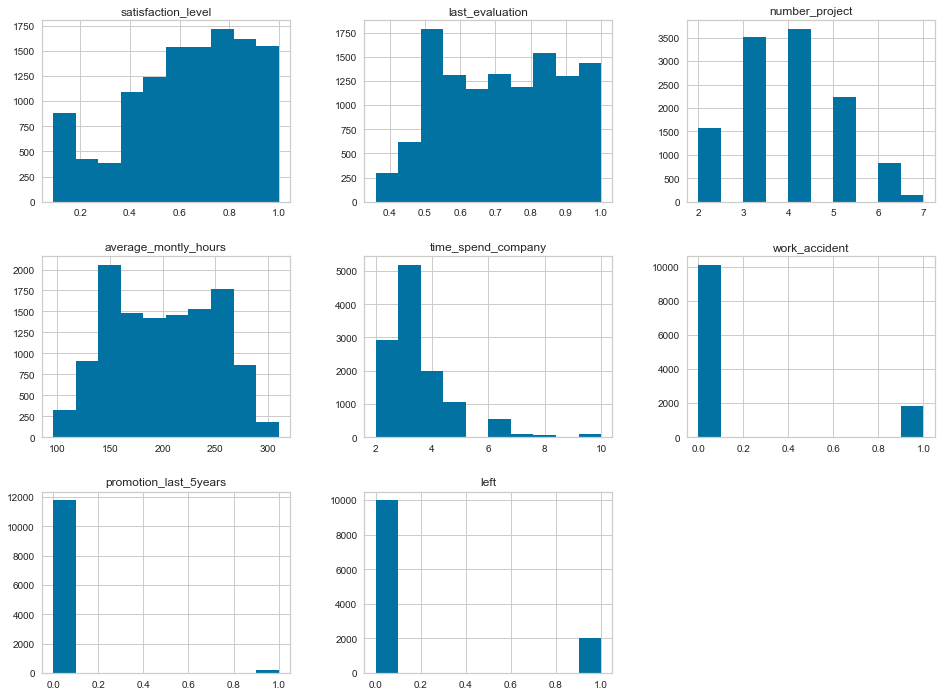

In [40]:
df.hist(figsize=(16,12))
plt.show()

Comments: We can see normal distribution, right skew and left skew.

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [41]:
df["left"].value_counts()

0    10000
1     1991
Name: left, dtype: int64

Target label (left) : not balance distributed

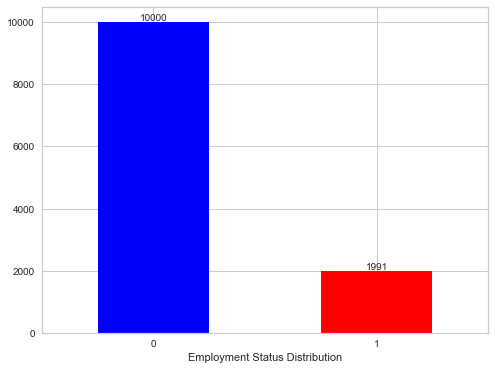

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = df["left"].value_counts().plot(kind='bar', color=['blue', 'red'], rot=0)
plt.xlabel("Employment Status Distribution")
ax.bar_label(ax.containers[0]);

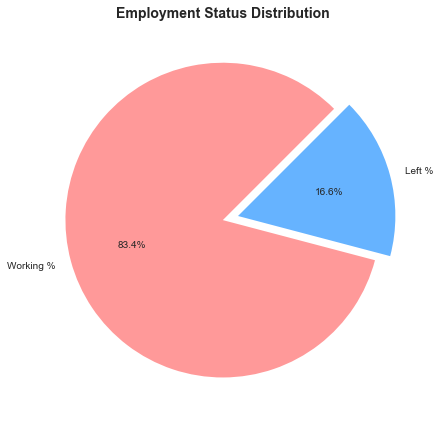

In [43]:
fig = plt.subplots(figsize=(8, 6))
plt.pie(x=df["left"].value_counts(), labels = ["Working %", "Left %"], 
        autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors= ['#ff9999','#66b3ff'])
plt.title('Employment Status Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [44]:
df["number_project"].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

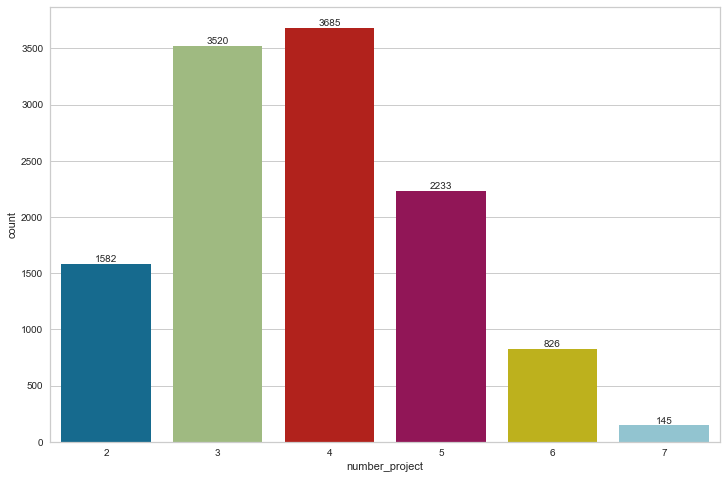

In [45]:
ax = sns.countplot(x='number_project', data=df)
ax.bar_label(ax.containers[0]);

In [46]:
pd.crosstab(df["number_project"], df["left"])

left               0    1
number_project           
2                725  857
3               3482   38
4               3448  237
5               1890  343
6                455  371
7                  0  145

In [47]:
df.groupby("number_project")["left"].value_counts(normalize=True)

number_project  left
2               1       0.541719
                0       0.458281
3               0       0.989205
                1       0.010795
4               0       0.935685
                1       0.064315
5               0       0.846395
                1       0.153605
6               0       0.550847
                1       0.449153
7               1       1.000000
Name: left, dtype: float64

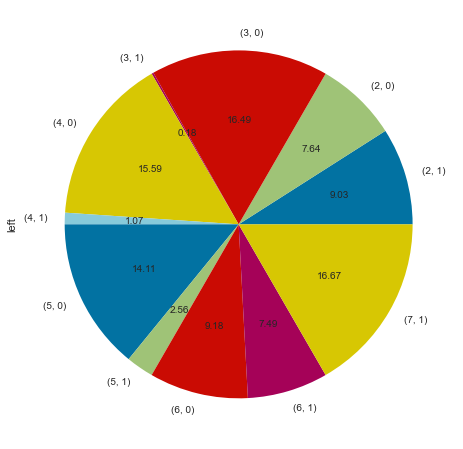

In [48]:
df.groupby("number_project")["left"].value_counts(normalize=True).plot.pie(autopct="%.2f");

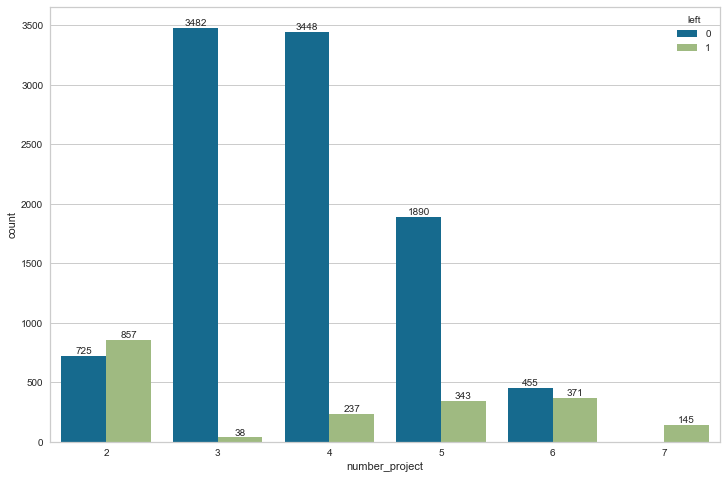

In [49]:
ax = sns.countplot(x='number_project', data=df, hue='left')

for p in ax.containers:
    ax.bar_label(p);

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


In [50]:
df["time_spend_company"].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

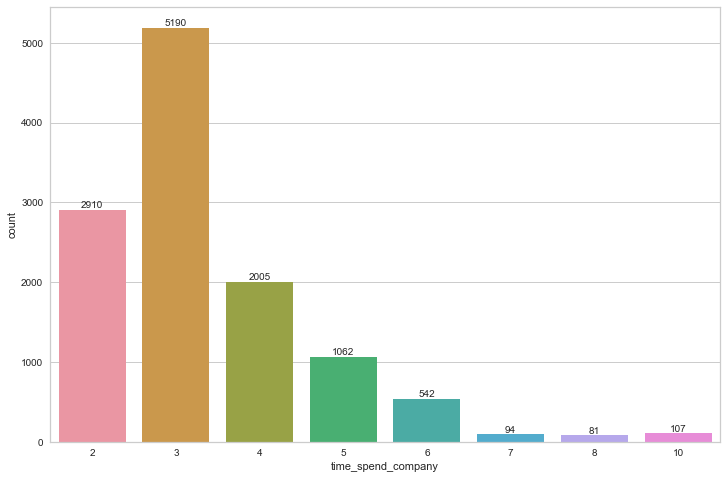

In [51]:
ax = sns.countplot(x='time_spend_company', data=df)
ax.bar_label(ax.containers[0]);

In [52]:
pd.crosstab(df["time_spend_company"], df["left"])

left                   0    1
time_spend_company           
2                   2879   31
3                   4316  874
4                   1510  495
5                    580  482
6                    433  109
7                     94    0
8                     81    0
10                   107    0

In [53]:
df.groupby("time_spend_company")["left"].value_counts(normalize=True)

time_spend_company  left
2                   0       0.989347
                    1       0.010653
3                   0       0.831599
                    1       0.168401
4                   0       0.753117
                    1       0.246883
5                   0       0.546139
                    1       0.453861
6                   0       0.798893
                    1       0.201107
7                   0       1.000000
8                   0       1.000000
10                  0       1.000000
Name: left, dtype: float64

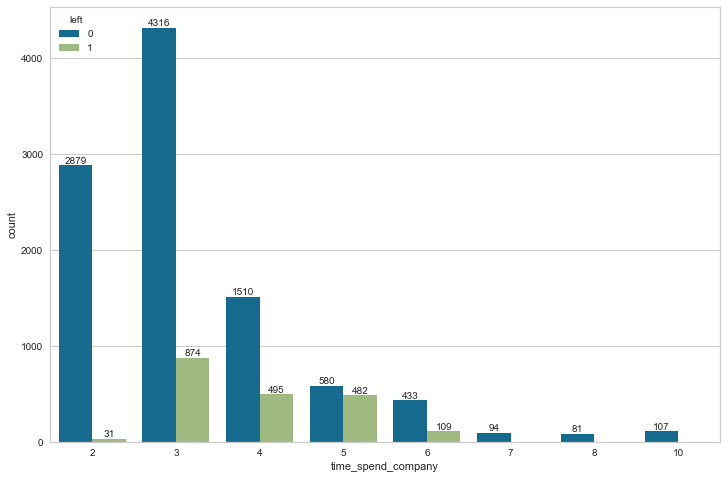

In [54]:
ax = sns.countplot(x='time_spend_company', data=df, hue='left')

for p in ax.containers:
    ax.bar_label(p);

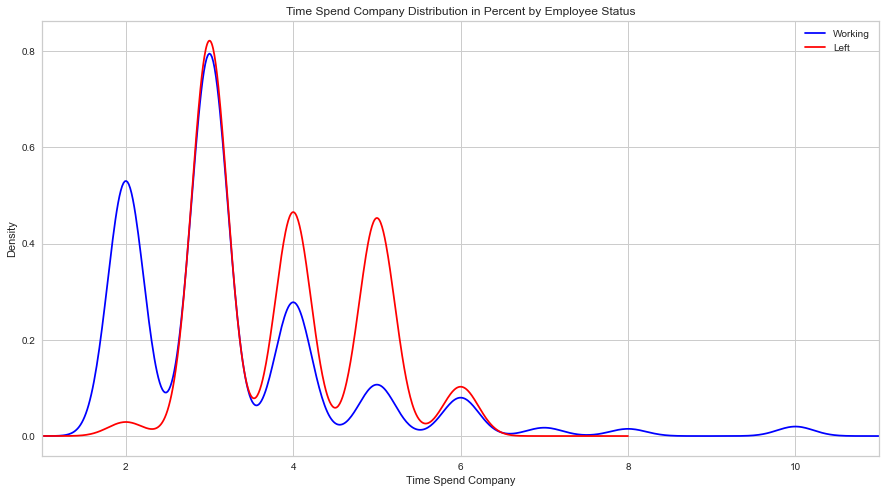

In [55]:
plt.figure(figsize=(15,8))

df.loc[df['left'] == 0, 'time_spend_company'].plot.kde(label = 'Working',legend=True, grid=True, color='blue')
df.loc[df['left'] == 1, 'time_spend_company'].plot.kde(label = 'Left', legend=True, grid=True, color='red')

plt.xlim(left=1, right=11)
plt.xlabel('Time Spend Company')
plt.ylabel('Density')
plt.title('Time Spend Company Distribution in Percent by Employee Status');

### Subplots of Features

You can use the methods of the matplotlib.

In [56]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
work_accident              2
promotion_last_5years      2
departments               10
salary                     3
left                       2
dtype: int64

In [57]:
def column_countplot(col):
    fig, ax = plt.subplots(figsize=(15,8))
    ax = sns.countplot(x=col, data=df, hue="left")
    plt.xticks(rotation=0)
    for p in ax.containers:
        ax.bar_label(p);
    
cols = ["work_accident", "promotion_last_5years", "departments", "salary"]

interact(column_countplot, col=cols);

interactive(children=(Dropdown(description='col', options=('work_accident', 'promotion_last_5years', 'departme…

In [58]:
def column_histplot(col):
    fig = plt.subplots(figsize=(15,8))
    sns.histplot(data=df, x=col, kde=True); 
    
cols = ["satisfaction_level", "last_evaluation", "average_montly_hours"] 


interact(column_histplot, col=cols);

interactive(children=(Dropdown(description='col', options=('satisfaction_level', 'last_evaluation', 'average_m…

In [59]:
def column_histplot(col):
    fig = plt.subplots(figsize=(12, 6))
    df.loc[df['left']==0, col].plot.hist(bins=100, label='working', legend=True);
    df.loc[df['left']==1, col].plot.hist(bins=100, label='left', legend=True, color='red', alpha=0.6); 
    
cols = ["satisfaction_level", "last_evaluation", "average_montly_hours"]  

interact(column_histplot, col=cols);

interactive(children=(Dropdown(description='col', options=('satisfaction_level', 'last_evaluation', 'average_m…

In [60]:
def column_kdeplot(col):
    plt.figure(figsize=(15,6))

    df.loc[df['left'] == 0, col].plot.kde(label = 'Working',legend=True, grid=True, color='blue')
    df.loc[df['left'] == 1, col].plot.kde(label = 'Left', legend=True, grid=True, color='red')

    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.title(f'{col} Distribution in Percent by Employee Status'); 
    
cols = ["satisfaction_level", "last_evaluation", "average_montly_hours"]  

interact(column_kdeplot, col=cols);

interactive(children=(Dropdown(description='col', options=('satisfaction_level', 'last_evaluation', 'average_m…

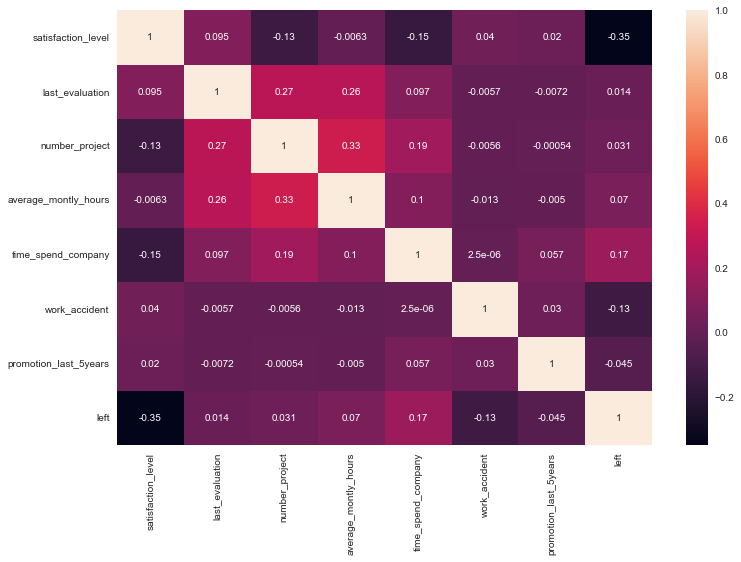

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

In [62]:
def categorical_numerical_comperation(numerical_col, caterical_col1, caterical_col2):
    

    f,ax = plt.subplots(1,2, figsize=(20,8))
    
    g1= sns.swarmplot( caterical_col1, numerical_col,hue='left', data=df, dodge=True, ax=ax[0], palette='Set2')
    ax[0].set_title(f'{numerical_col} vs {caterical_col1} separeted by Attrition')
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45); 

    
    g2 = sns.swarmplot( caterical_col2, numerical_col,hue='left', data=df, dodge=True, ax=ax[1], palette='Set2')
    ax[1].set_title(f'{numerical_col} vs {caterical_col2} separeted by Attrition')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=45);

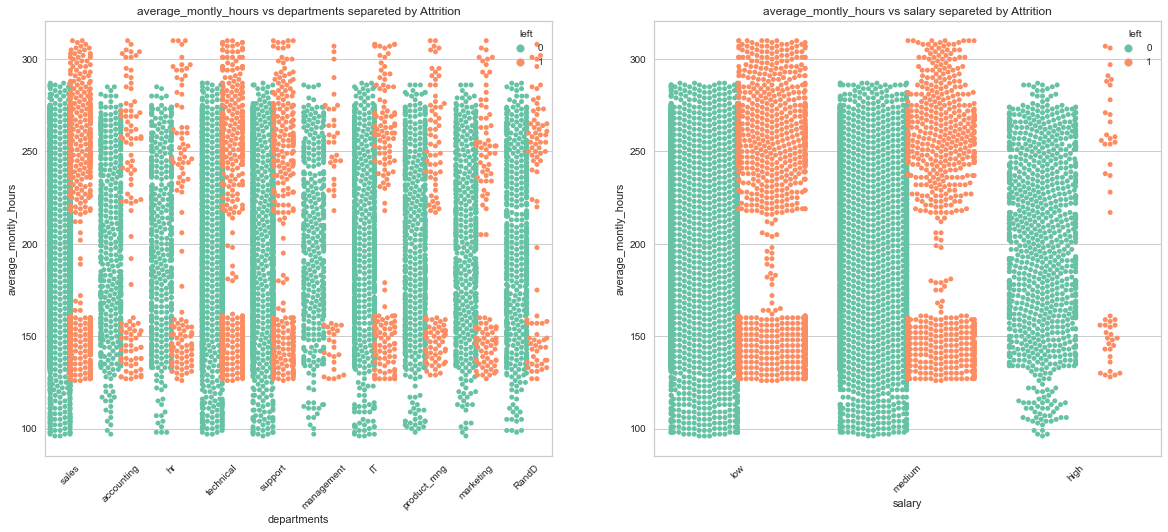

In [63]:
categorical_numerical_comperation('average_montly_hours', 'departments', 'salary')

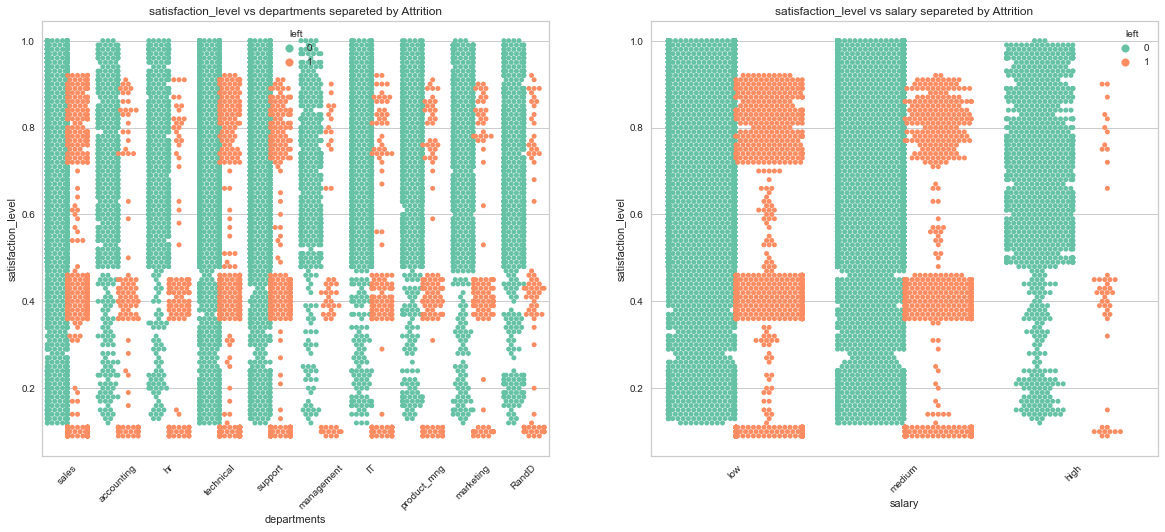

In [64]:
categorical_numerical_comperation('satisfaction_level', 'departments', 'salary')

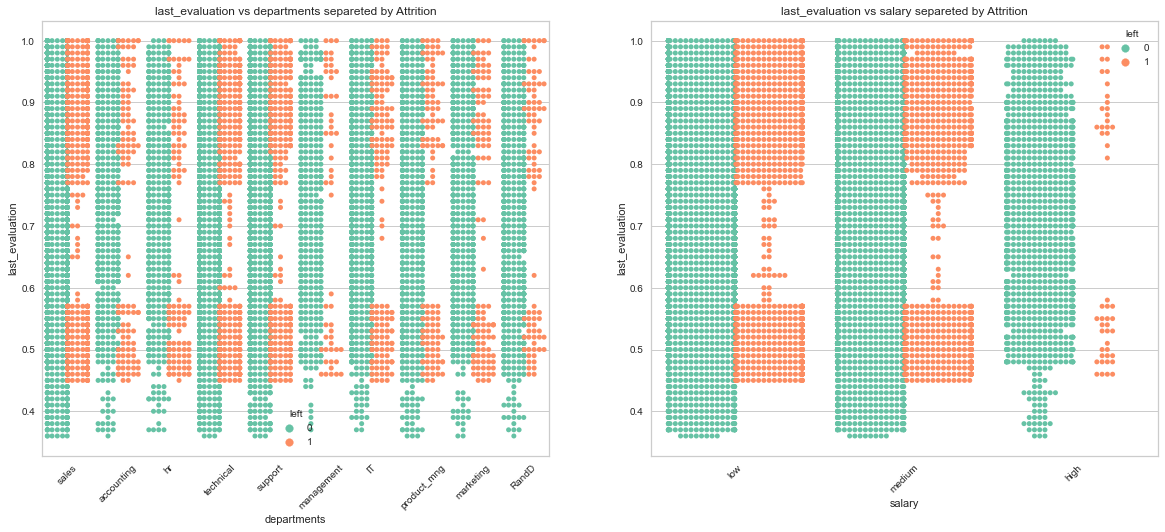

In [65]:
categorical_numerical_comperation('last_evaluation', 'departments', 'salary')

In [66]:
emp_left = df[df['left'] == 1]
emp_stayed = df[df['left']==0]

In [67]:
def numerical_colum_investigaton(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(emp_left[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(emp_stayed[col_name], label='Employee who stayes', ax=ax[0], shade=True, color='salmon')
    
    sns.boxplot(y=col_name, x='left',data=df, palette='Set2', ax=ax[1])

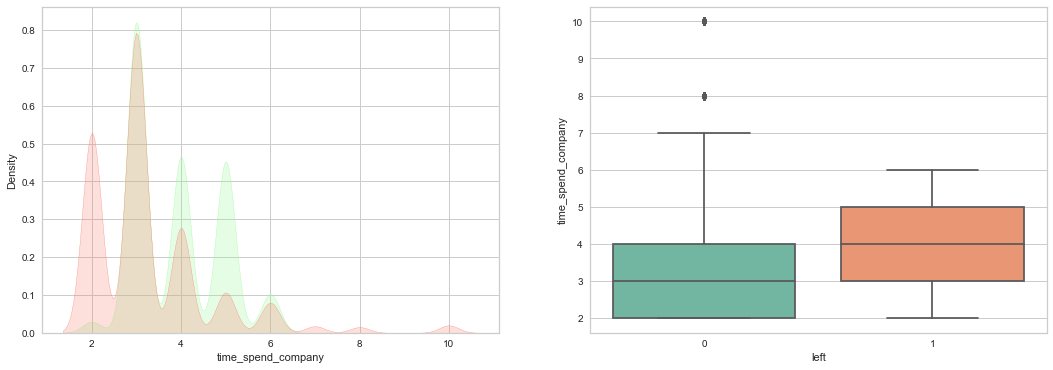

In [68]:
numerical_colum_investigaton('time_spend_company')

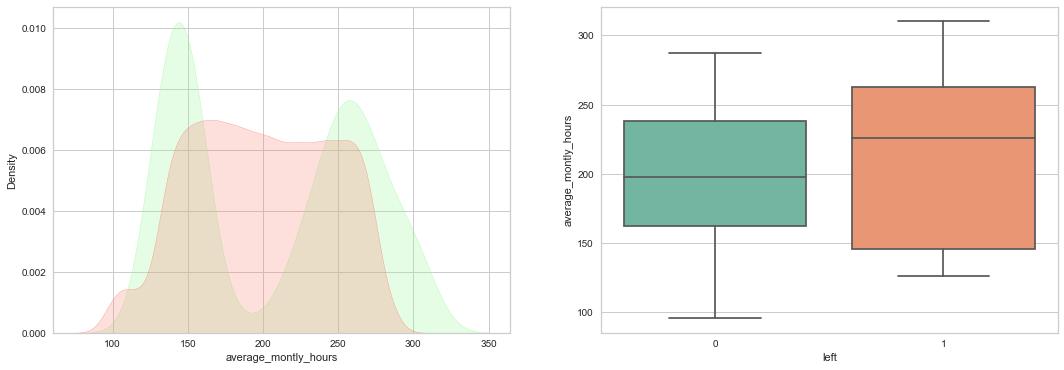

In [69]:
numerical_colum_investigaton('average_montly_hours')

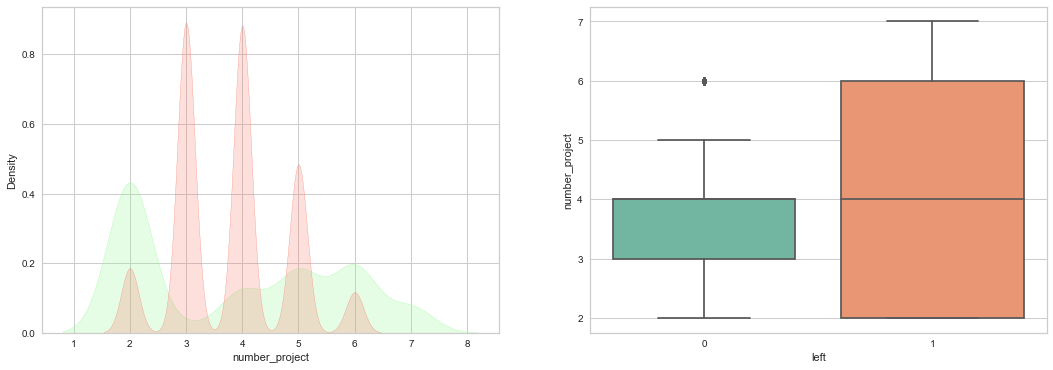

In [70]:
numerical_colum_investigaton('number_project')

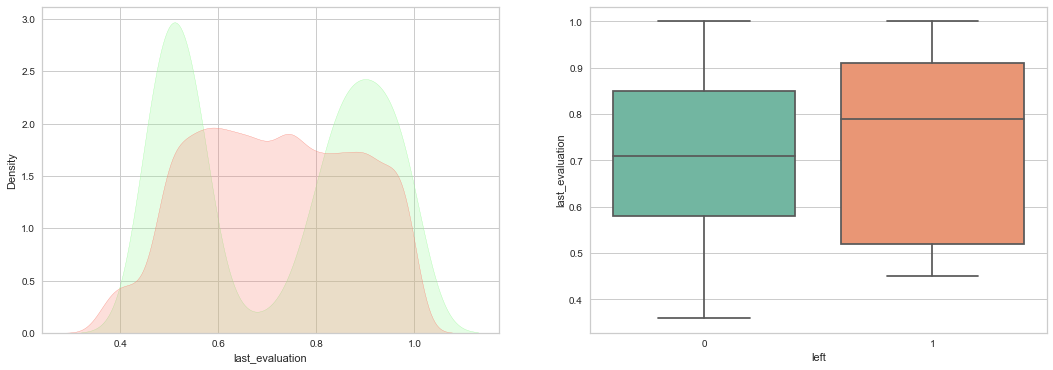

In [71]:
numerical_colum_investigaton('last_evaluation')

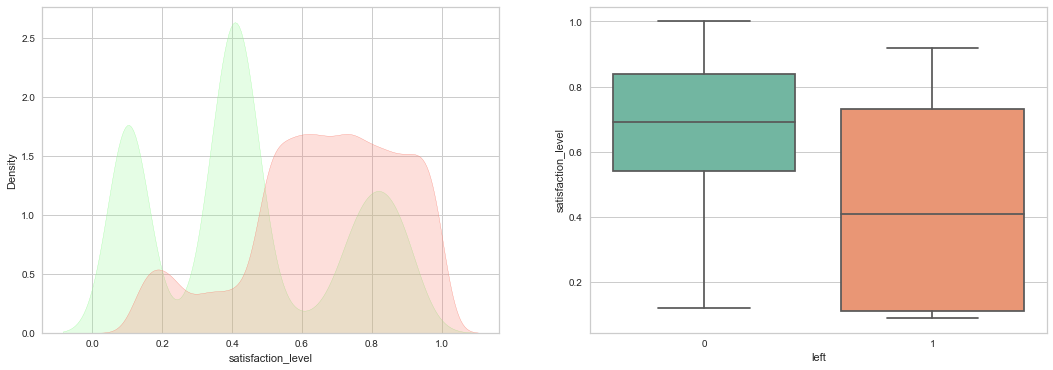

In [72]:
numerical_colum_investigaton('satisfaction_level')

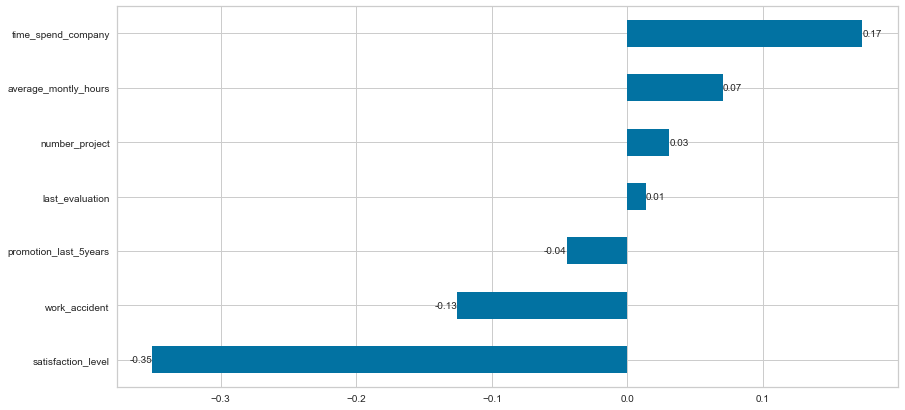

In [73]:
plt.figure(figsize=(14,7))
ax = df.corr()["left"].drop("left").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

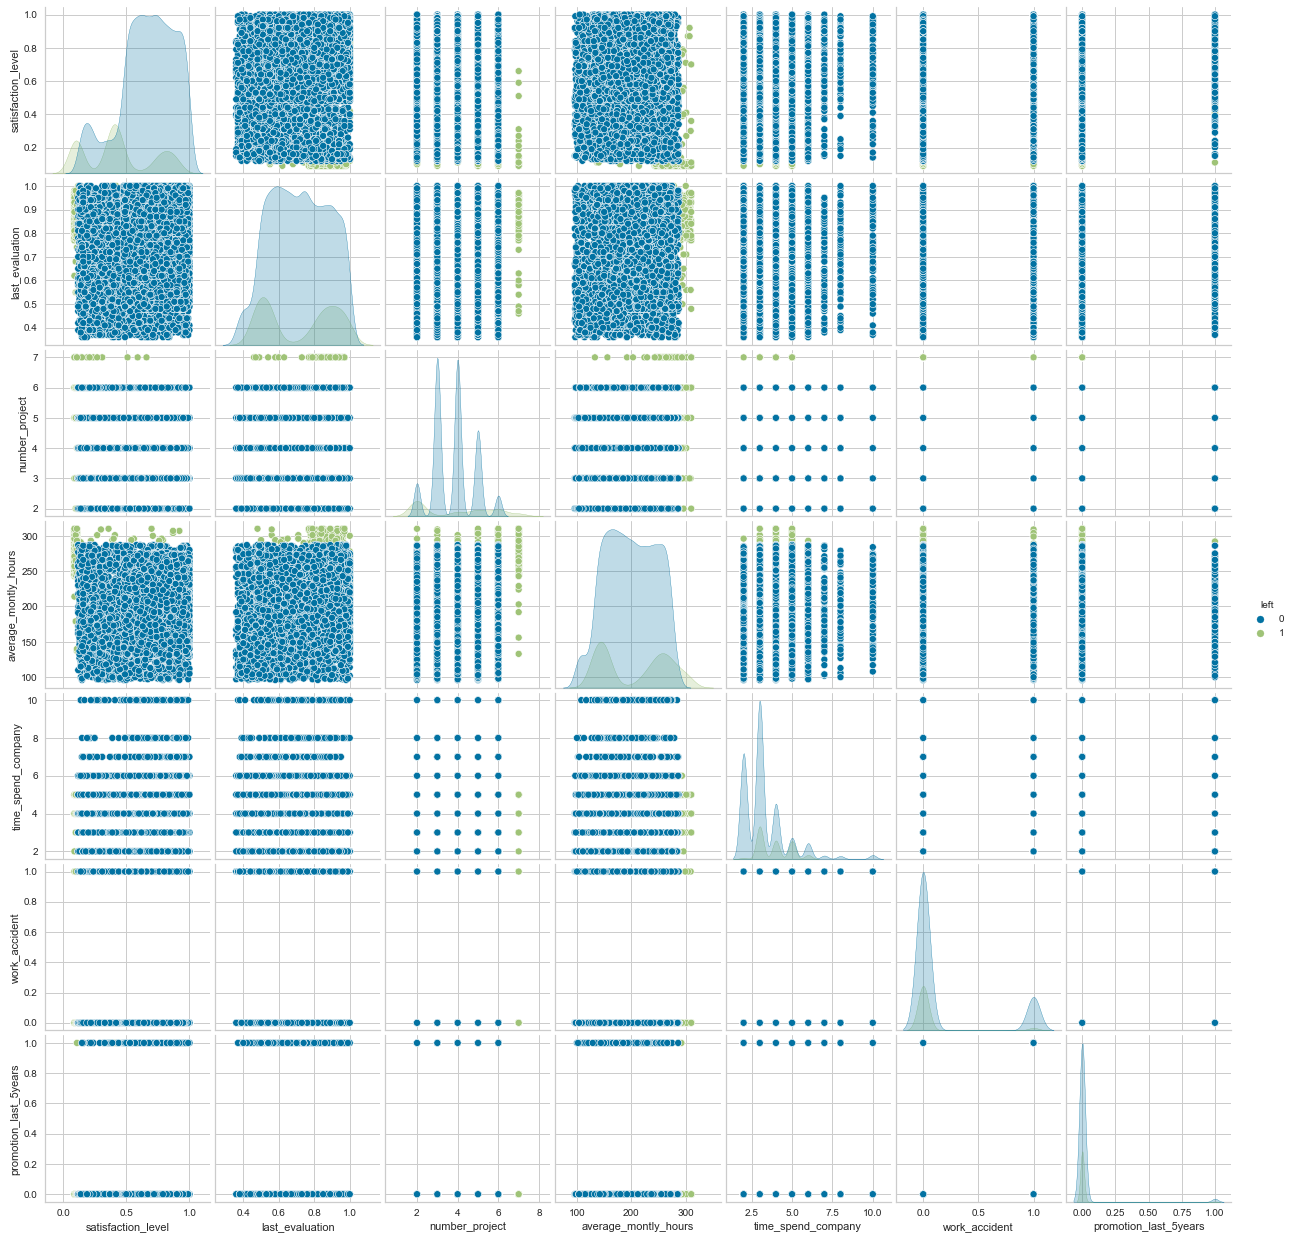

In [74]:
sns.pairplot(df, hue = "left");

## 3. Data Pre-Processing

In [75]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      0       sales   
2                   4              0                      0       sales   
3                   5              0                      0       sales   
4                   3              0                      0       sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   departments            11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   left                   11991 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


#### Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [77]:
df_enc = df.copy()

In [78]:
enc_lab = LabelEncoder()
df_enc['departments'] = enc_lab.fit_transform(df_enc[['departments']])

enc_ord = OrdinalEncoder(categories=[['low', 'medium', 'high']])
df_enc['salary'] = enc_ord.fit_transform(df_enc[['salary']])

In [79]:
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  departments  \
0                   3              0                      0            7   
1                   6              0                      0            7   
2                   4              0                      0            7   
3                   5              0                      0            7   
4                   3              0                      0            7   

   salary  left  
0     0.0     1  
1     1.0     1  
2     1.0     1  
3     0.0     1  
4     0.0     1

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [80]:
scaler = MinMaxScaler()

In [81]:
df_scaled = scaler.fit_transform(df_enc)

In [82]:
df_scaled = pd.DataFrame(df_scaled, columns=df_enc.columns)
df_scaled.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.318681         0.265625             0.0              0.285047   
1            0.780220         0.781250             0.6              0.775701   
2            0.021978         0.812500             1.0              0.822430   
3            0.692308         0.796875             0.6              0.593458   
4            0.307692         0.250000             0.0              0.294393   

   time_spend_company  work_accident  promotion_last_5years  departments  \
0               0.125            0.0                    0.0     0.777778   
1               0.500            0.0                    0.0     0.777778   
2               0.250            0.0                    0.0     0.777778   
3               0.375            0.0                    0.0     0.777778   
4               0.125            0.0                    0.0     0.777778   

   salary  left  
0     0.0   1.0  
1     0.5   1.0  
2     0.5   1.0  
3     0.0   1.0  
4     0.0   1.0

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [83]:
df["left"].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [84]:
pd.crosstab(df["left"], df["satisfaction_level"])

satisfaction_level  0.09  0.10  0.11  0.12  0.13  0.14  0.15  0.16  0.17  \
left                                                                       
0                      0     0     0    24    44    55    66    58    59   
1                    110   203   188     2     1     7     3     1     3   

satisfaction_level  0.18  0.19  0.20  0.21  0.22  0.23  0.24  0.25  0.26  \
left                                                                       
0                     56    56    53    62    52    49    67    28    27   
1                      0     2     3     1     1     2     1     1     1   

satisfaction_level  0.27  0.28  0.29  0.30  0.31  0.32  0.33  0.34  0.35  \
left                                                                       
0                     21    23    31    36    35    38    29    42    34   
1                      2     1     1     2     7     4     1     2     2   

satisfaction_level  0.36  0.37  0.38  0.39  0.40  0.41  0.42  0.43  0.44  \
left                                                                       
0                     39    37    31    29    37    35    41    36    51   
1                     59    93    85    82    89    69    67   105    87   

satisfaction_level  0.45  0.46  0.47  0.48  0.49  0.50  0.51  0.52  0.53  \
left                                                                       
0                     41    27    32   116   175   198   157   172   146   
1                     80    36     2     4     2     2     3     0     4   

satisfaction_level  0.54  0.55  0.56  0.57  0.58  0.59  0.60  0.61  0.62  \
left                                                                       
0                    162   157   163   175   161   181   165   172   160   
1                      4     2     3     4     1     4     2     4     2   

satisfaction_level  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.70  0.71  \
left                                                                       
0                    180   163   170   186   157   144   178   171   150   
1                      4     1     1     6     1     1     0     5     2   

satisfaction_level  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.80  \
left                                                                       
0                    180   175   186   165   165   168   163   151   170   
1                     19    26    28    23    23    26    31    26    16   

satisfaction_level  0.81  0.82  0.83  0.84  0.85  0.86  0.87  0.88  0.89  \
left                                                                       
0                    150   150   167   166   156   144   145   143   161   
1                     26    30    29    33    21    26    31    17    30   

satisfaction_level  0.90  0.91  0.92  0.93  0.94  0.95  0.96  0.97  0.98  \
left                                                                       
0                    146   163   151   148   143   153   179   150   165   
1                     26    24    12     0     0     0     0     0     0   

satisfaction_level  0.99  1.00  
left                            
0                    157   100  
1                      0     0

In [85]:
pd.crosstab(df["left"], df["last_evaluation"])

last_evaluation  0.36  0.37  0.38  0.39  0.40  0.41  0.42  0.43  0.44  0.45  \
left                                                                          
0                  19    46    42    45    49    52    45    44    35    45   
1                   0     0     0     0     0     0     0     0     0    33   

last_evaluation  0.46  0.47  0.48  0.49  0.50  0.51  0.52  0.53  0.54  0.55  \
left                                                                          
0                  43    54   133   183   197   193   169   181   178   218   
1                  88    67    79    59    72    71    64    66    74    63   

last_evaluation  0.56  0.57  0.58  0.59  0.60  0.61  0.62  0.63  0.64  0.65  \
left                                                                          
0                 181   192   198   219   182   198   189   201   198   172   
1                  67    66     5     2     4     2     8     3     0     4   

last_evaluation  0.66  0.67  0.68  0.69  0.70  0.71  0.72  0.73  0.74  0.75  \
left                                                                          
0                 190   203   189   176   178   166   181   186   222   204   
1                   1     2     4     0     6     5     1     3     5     5   

last_evaluation  0.76  0.77  0.78  0.79  0.80  0.81  0.82  0.83  0.84  0.85  \
left                                                                          
0                 190   186   160   170   174   181   167   159   171   191   
1                   2    26    21    25    27    29    28    52    47    53   

last_evaluation  0.86  0.87  0.88  0.89  0.90  0.91  0.92  0.93  0.94  0.95  \
left                                                                          
0                 169   174   150   180   200   182   155   150   151   161   
1                  50    67    37    55    44    42    52    59    48    50   

last_evaluation  0.96  0.97  0.98  0.99  1.00  
left                                           
0                 164   170   176   167   106  
1                  44    48    32    30    94

In [86]:
df_cluster = df_scaled[['satisfaction_level', 'last_evaluation']][df_scaled.left==1.0]
df_cluster.head()

satisfaction_level  last_evaluation
0            0.318681         0.265625
1            0.780220         0.781250
2            0.021978         0.812500
3            0.692308         0.796875
4            0.307692         0.250000

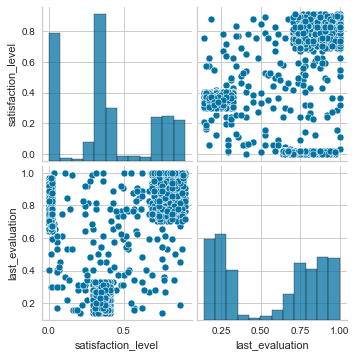

In [87]:
sns.pairplot(df_cluster);

In [88]:
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [89]:
hopkins(df_cluster, df_cluster.shape[0])

0.11219805170143744

In [90]:
range_n_clusters = range(2,8)
ssd = {}

# for 10 different clusters
for k in range_n_clusters:
    # fit clusterer
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    # compute the average within-cluster distance (ssd) for each cluster 
    ssd[k] = kmeans.inertia_
    print(f"sse for {k} cluster: {kmeans.inertia_}")

sse for 2 cluster: 165.46784523610177
sse for 3 cluster: 27.168743764721327
sse for 4 cluster: 22.305040332772897
sse for 5 cluster: 18.35511953237384
sse for 6 cluster: 15.685904819778443
sse for 7 cluster: 13.280823775337634


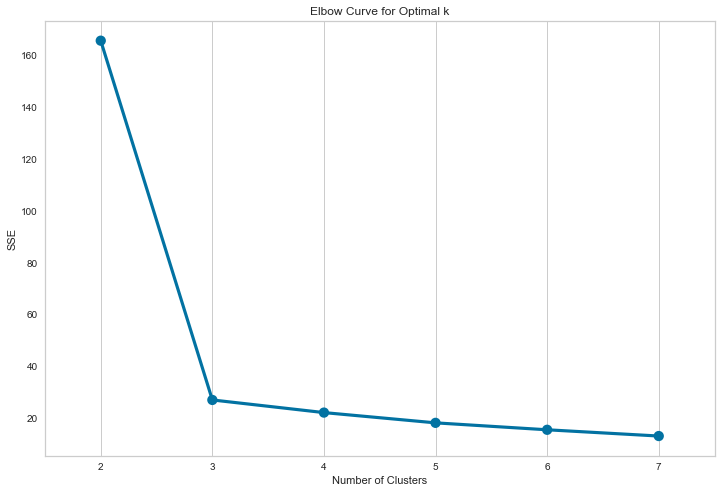

In [91]:
plt.title("Elbow Curve for Optimal k")
sns.pointplot(x=list(ssd.keys()), y=list(ssd.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid();

In [92]:
ssd

{2: 165.46784523610177,
 3: 27.168743764721327,
 4: 22.305040332772897,
 5: 18.35511953237384,
 6: 15.685904819778443,
 7: 13.280823775337634}

In [93]:
pd.Series(ssd).diff()

2           NaN
3   -138.299101
4     -4.863703
5     -3.949921
6     -2.669215
7     -2.405081
dtype: float64

In [94]:
ssd_diff =pd.DataFrame(-pd.Series(ssd).diff())
ssd_diff

0
2         NaN
3  138.299101
4    4.863703
5    3.949921
6    2.669215
7    2.405081

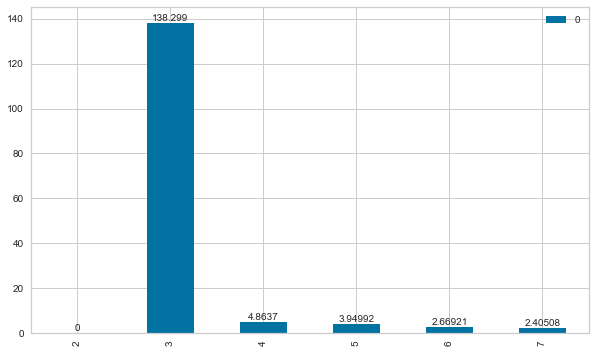

In [95]:
ax = ssd_diff.plot(kind='bar', figsize=(10,6))
ax.bar_label(ax.containers[0]);

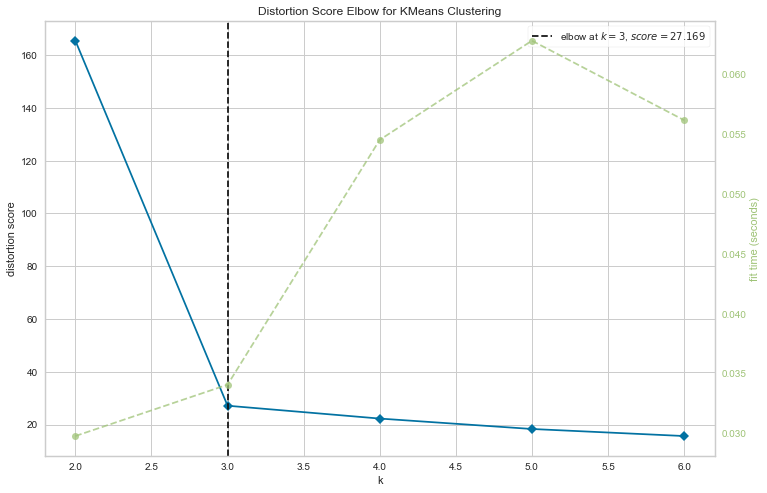

In [96]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,7))
visu.fit(df_cluster)
visu.poof();

In [97]:
range_n_clusters = range(2,8)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_cluster)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_cluster, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5904086526749719
For n_clusters=3, the silhouette score is 0.7935190745166327
For n_clusters=4, the silhouette score is 0.6960603437974107
For n_clusters=5, the silhouette score is 0.6192377565757545
For n_clusters=6, the silhouette score is 0.6227575333685603
For n_clusters=7, the silhouette score is 0.44690778352280114


In [98]:
model_kmeans = KMeans(n_clusters = 3, random_state=42).fit(df_cluster)

In [99]:
model_kmeans.labels_

array([1, 2, 0, ..., 1, 2, 1])

In [100]:
df_cluster["label"] = model_kmeans.labels_
df_cluster.sample(5)

satisfaction_level  last_evaluation  label
49             0.373626         0.171875      1
664            0.725275         0.765625      2
597            0.307692         0.156250      1
233            0.362637         0.312500      1
331            0.021978         0.765625      0

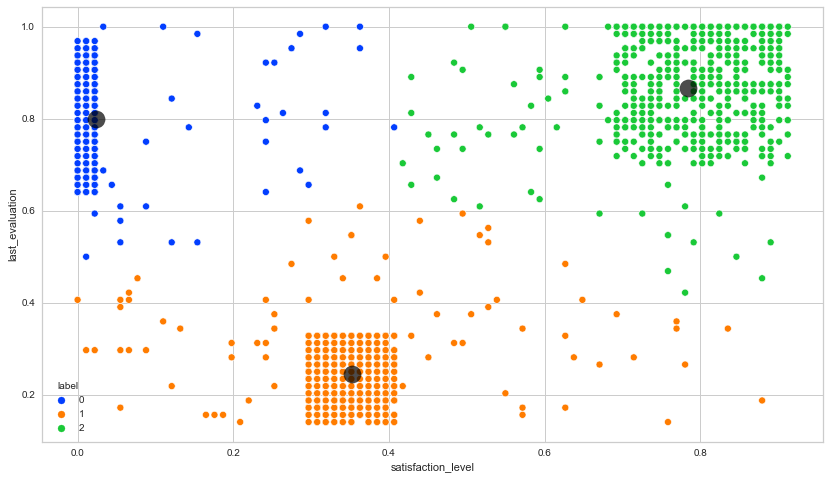

In [101]:
plt.figure(figsize=(14,8))

sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='label', data=df_cluster, palette="bright")
centers = model_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.7);

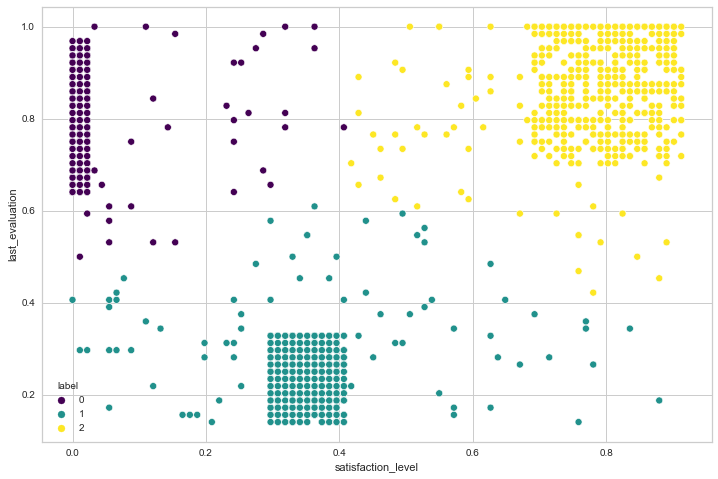

In [102]:
sns.scatterplot(data=df_cluster, x='satisfaction_level', 
                y='last_evaluation', hue='label', palette='viridis');

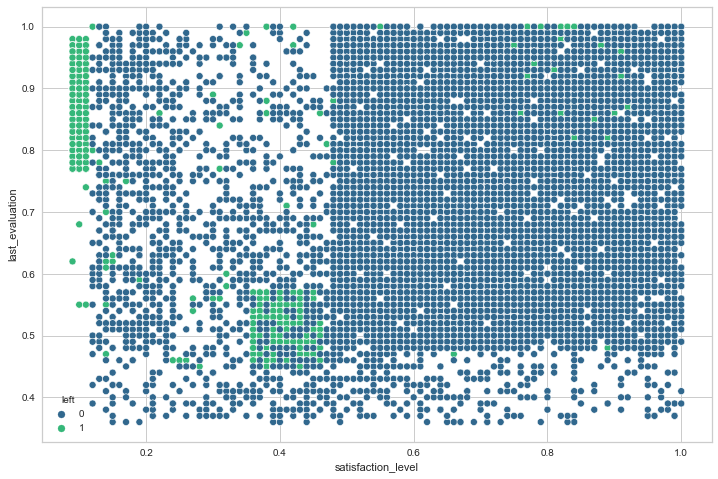

In [103]:
sns.scatterplot(data=df, x='satisfaction_level', 
                y='last_evaluation', hue='left', palette='viridis');

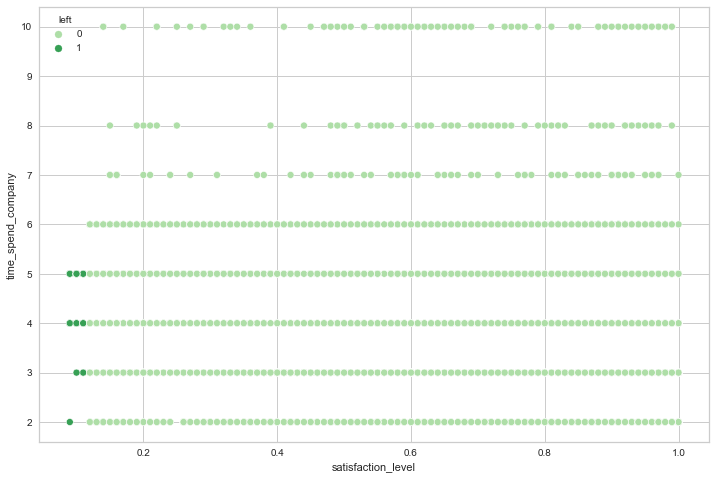

In [104]:
sns.scatterplot(data=df, x='satisfaction_level', 
                y='time_spend_company', hue='left', palette='Greens');

In [105]:
print(f'Inertia Score (n=3)    : {model_kmeans.inertia_}')
print(f'Silhouette Score (n=3) : {silhouette_score(df_cluster, model_kmeans.labels_)}')

Inertia Score (n=3)    : 27.16874376472133
Silhouette Score (n=3) : 0.890058225656418


In [106]:
df_cluster.groupby('label')[['satisfaction_level','last_evaluation']].describe()

satisfaction_level                                                    \
                   count      mean       std       min       25%       50%   
label                                                                        
0                  529.0  0.023681  0.052150  0.000000  0.010989  0.010989   
1                  908.0  0.351963  0.073091  0.000000  0.318681  0.351648   
2                  554.0  0.783850  0.090763  0.417582  0.736264  0.796703   

                          last_evaluation                                \
            75%       max           count      mean       std       min   
label                                                                     
0      0.021978  0.406593           529.0  0.799711  0.099661  0.500000   
1      0.384615  0.879121           908.0  0.244459  0.071627  0.140625   
2      0.854396  0.912088           554.0  0.867272  0.107866  0.421875   

                                               
            25%       50%       75%       max  
label                                          
0      0.718750  0.796875  0.890625  1.000000  
1      0.187500  0.234375  0.296875  0.609375  
2      0.785156  0.875000  0.968750  1.000000

In [107]:
df_cluster["left"] = df["left"]

In [108]:
adjusted_rand_score(df_cluster["left"], df_cluster["label"]) #perfect clustering

0.0

## 5. Model Building

In [109]:
df.sample(5)

satisfaction_level  last_evaluation  number_project  \
10304                0.53             0.85               5   
5485                 0.93             0.49               5   
9218                 0.17             0.81               5   
11783                0.56             0.74               3   
9505                 0.90             0.87               3   

       average_montly_hours  time_spend_company  work_accident  \
10304                   268                   3              1   
5485                    167                   3              0   
9218                    280                   4              0   
11783                   265                   3              0   
9505                    220                   3              0   

       promotion_last_5years  departments  salary  left  
10304                      0        sales  medium     0  
5485                       0        RandD  medium     0  
9218                       0  product_mng  medium     0  
11783                      0      support  medium     0  
9505                       0      support     low     0

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   departments            11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   left                   11991 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


### Split Data as Train and Test Set

In [111]:
X = df.drop('left',axis=1)
y = df['left']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### #Distance Based(?) Algorithm

#### Model Building

In [113]:
preprocessor = ColumnTransformer(transformers=[
    ('encoder_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']),
    ('encoder_nominal', OrdinalEncoder(), ['departments'])], remainder='passthrough')

In [114]:
knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier())]) # n_neighbors=5

In [115]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['departments'])])),
                ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [116]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
y_pred_proba = knn_model.predict_proba(X_test)

In [118]:
pd.DataFrame(y_pred_proba)

0    1
0     0.0  1.0
1     1.0  0.0
2     1.0  0.0
3     0.0  1.0
4     0.0  1.0
...   ...  ...
2394  1.0  0.0
2395  1.0  0.0
2396  1.0  0.0
2397  1.0  0.0
2398  1.0  0.0

[2399 rows x 2 columns]

In [119]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

pd.DataFrame.from_dict(my_dict).sample(10)

Actual  Pred  Proba_1  Proba_0
9276        0     0      0.0      1.0
8366        0     0      0.0      1.0
2102        0     0      0.0      1.0
2360        0     0      0.0      1.0
10278       0     1      0.8      0.2
633         1     1      1.0      0.0
6372        0     0      0.0      1.0
1430        1     1      1.0      0.0
4420        0     0      0.0      1.0
2714        0     1      0.8      0.2

#### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In [120]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [121]:
confusion_matrix(y_test, y_pred)

array([[1947,   51],
       [  45,  356]], dtype=int64)

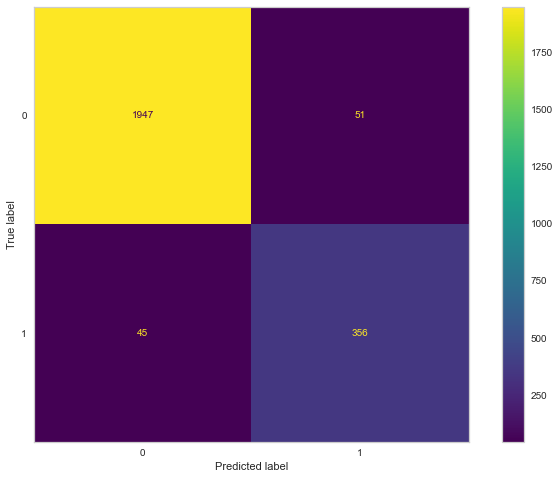

In [122]:
plot_confusion_matrix(knn_model, X_test, y_test)
plt.grid(b=None);

In [123]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[1947   51]
 [  45  356]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1998
           1       0.87      0.89      0.88       401

    accuracy                           0.96      2399
   macro avg       0.93      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7841  161]
 [ 147 1443]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8002
           1       0.90      0.91      0.90      1590

    accuracy                           0.97      9592
   macro avg       0.94      0.94      0.94      9592
weighted avg       0.97      0.97      0.97      9592



In [124]:
# CROSS VALIDATION

knn_cv_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier())])

scores = cross_validate(knn_cv_model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.958298
test_precision    0.858211
test_recall       0.896855
test_f1           0.876879
test_roc_auc      0.956899
dtype: float64

In [125]:
# Elbow Method for Choosing Best K Values

knn_elbow_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier())])
    
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    
    knn_elbow_model.set_params(knn__n_neighbors=k)
    knn_elbow_model.fit(X_train,y_train)
       
    scores = cross_validate(knn_elbow_model, X_train, y_train, scoring = ['recall'], cv=10, return_train_score=True)
    
    accuracy_test_mean = scores["test_recall"].mean() 
    accuracy_train_mean = scores["train_recall"].mean() 

    
    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)   

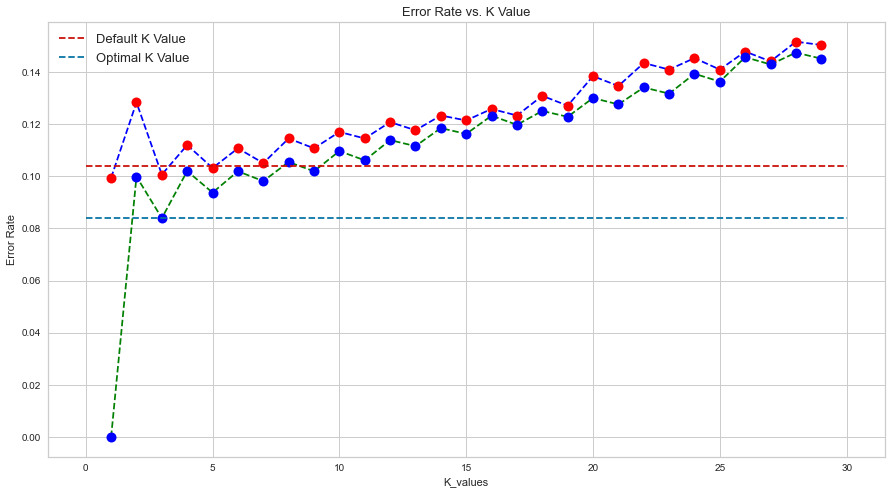

In [126]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value', size=13)
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.104, xmin = 0, xmax = 30, colors= 'r', linestyles='--', label='Default K Value')
plt.hlines(y=0.084, xmin = 0, xmax = 30, colors= 'b', linestyles='--', label='Optimal K Value')
plt.legend(prop={'size':13});

In [127]:
# MODELING WITH OPTIMAL K VALUE

knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier(n_neighbors=3))])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['departments'])])),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [128]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[1948   50]
 [  48  353]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1998
           1       0.88      0.88      0.88       401

    accuracy                           0.96      2399
   macro avg       0.93      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7896  106]
 [ 133 1457]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8002
           1       0.93      0.92      0.92      1590

    accuracy                           0.98      9592
   macro avg       0.96      0.95      0.95      9592
weighted avg       0.97      0.98      0.97      9592



In [129]:
# CROSS VALIDATION for Optimal K Value

knn_cv_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier(n_neighbors=3))])

scores = cross_validate(knn_cv_model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.961112
test_precision    0.870631
test_recall       0.899371
test_f1           0.884528
test_roc_auc      0.952059
dtype: float64

In [130]:
# GRID SEARCH

model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier())])

param_grid = {'knn__n_neighbors': range(1,25), 'knn__p': [1,2], 'knn__weights': ['uniform', 'distance'],
              'knn__leaf_size': [10, 15, 30]}

knn_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='recall', n_jobs=-1)

%time knn_grid_model.fit(X_train,y_train)

print('\n', knn_grid_model.best_params_)
print('\n', knn_grid_model.best_estimator_)
print('\n', 'Best Score :', knn_grid_model.best_score_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
CPU times: total: 23.4 s
Wall time: 2min 15s

 {'knn__leaf_size': 10, 'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['departments'])])),
                ('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifie

In [131]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1942   56]
 [  44  357]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1998
           1       0.86      0.89      0.88       401

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[8002    0]
 [   0 1590]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       1.00      1.00      1.00      1590

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [132]:
# best leaf_size , p parameters and with optimal k_value

knn_final_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1, weights='distance'))])

In [133]:
knn_final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['departments'])])),
                ('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1,
                                      weights='distance'))])

In [134]:
eval_metric(knn_final_model, X_train, y_train, X_test, y_test)

Test_Set
[[1947   51]
 [  44  357]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1998
           1       0.88      0.89      0.88       401

    accuracy                           0.96      2399
   macro avg       0.93      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[8002    0]
 [   0 1590]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       1.00      1.00      1.00      1590

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [135]:
# CROSS VALIDATION for final model

knn_final_cv_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1, weights='distance'))])

scores = cross_validate(knn_final_cv_model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.961009
test_precision    0.865981
test_recall       0.905031
test_f1           0.884902
test_roc_auc      0.955554
dtype: float64

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

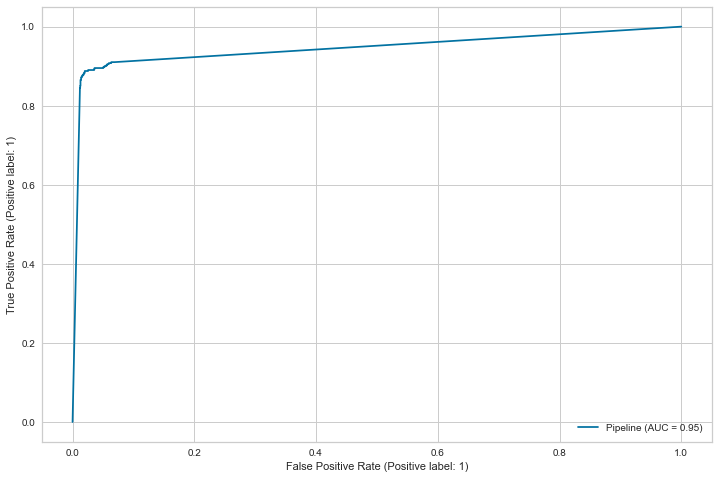

In [136]:
plot_roc_curve(knn_final_model, X_test, y_test);

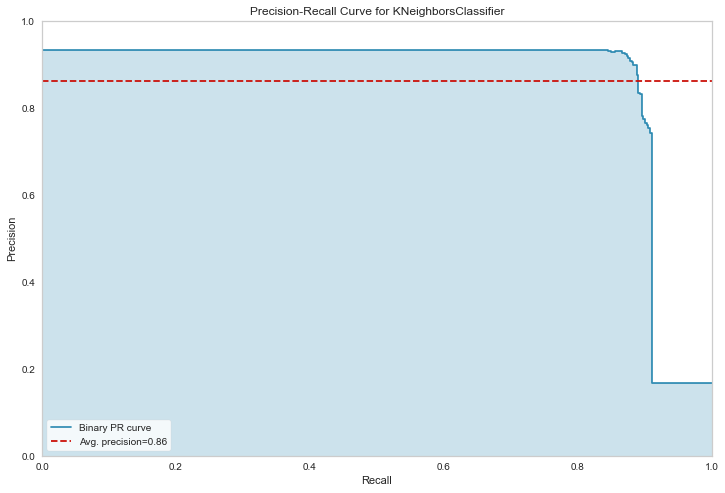

In [137]:
viz = PrecisionRecallCurve(knn_final_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

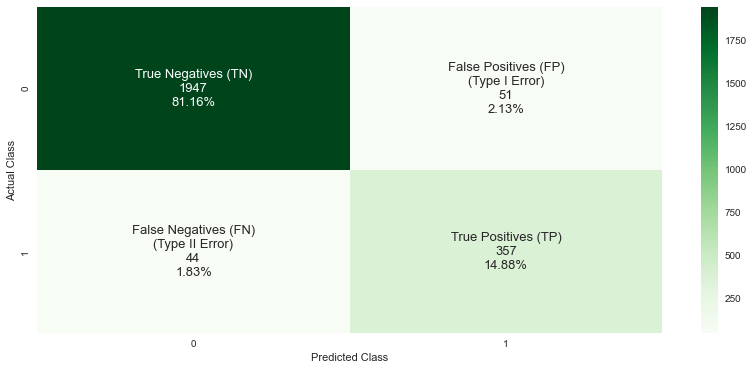

In [138]:
plt.figure(figsize=(14,6))

y_pred = knn_final_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='Greens')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

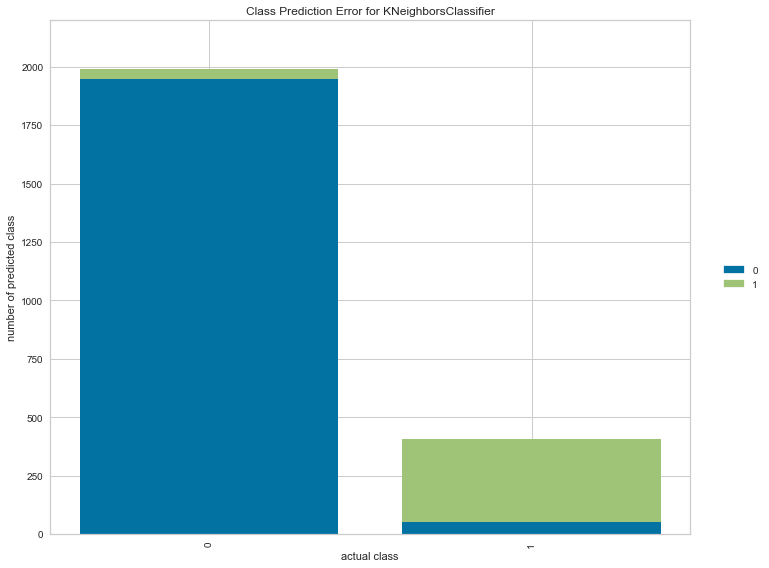

In [139]:
visualizer = ClassPredictionError(knn_final_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

In [140]:
y_pred_proba = knn_final_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.8608454869685169

In [141]:
# saving scores for comparing in the end

y_pred = knn_final_model.predict(X_test)

knn_auc = roc_auc_score(y_test, y_pred,average=None)
knn_f1 = f1_score(y_test, y_pred, average=None)
knn_pre = precision_score(y_test, y_pred, average=None)
knn_recall = recall_score(y_test, y_pred, average=None)

#### Prediction

In [142]:
knn_pred_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1, weights='distance'))])

In [143]:
knn_pred_model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(),
                                                  ['departments'])])),
                ('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1,
                                      weights='distance'))])

### Save the model

In [144]:
pickle.dump(knn_pred_model, open('knn_final_model', 'wb'))

In [145]:
loaded_model = pickle.load(open('knn_final_model', 'rb'))

In [146]:
sample = pd.DataFrame({
        'satisfaction_level': [0.72,0.49,0.75],
        'last_evaluation': [0.54,0.80,0.23],
        'number_project': [3,2,4],
        'average_montly_hours': [158,230,137],
        'time_spend_company': [2,3,5],
        'work_accident': [0,0,1],
        'promotion_last_5years': [0,0,1],
        'departments': ['technical', 'IT', 'sales'],
        'salary': ['medium', 'high', 'low']
    }, index=[0,1,2])

In [147]:
sample

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.72             0.54               3                   158   
1                0.49             0.80               2                   230   
2                0.75             0.23               4                   137   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   2              0                      0   technical   
1                   3              0                      0          IT   
2                   5              1                      1       sales   

   salary  
0  medium  
1    high  
2     low

In [148]:
predictions = loaded_model.predict(sample)
predictions_proba = loaded_model.predict_proba(sample)

In [149]:
sample["pred"] = predictions
sample["pred_proba_1"] = predictions_proba[:,1]
sample["pred_proba_0"] = predictions_proba[:,0]
sample.T

0     1      2
satisfaction_level          0.72  0.49   0.75
last_evaluation             0.54   0.8   0.23
number_project                 3     2      4
average_montly_hours         158   230    137
time_spend_company             2     3      5
work_accident                  0     0      1
promotion_last_5years          0     0      1
departments            technical    IT  sales
salary                    medium  high    low
pred                           0     0      0
pred_proba_1                 0.0   0.0    0.0
pred_proba_0                 1.0   1.0    1.0

In [150]:
sample2 = df.sample(10)
sample2

satisfaction_level  last_evaluation  number_project  \
11136                0.56             0.94               3   
7675                 0.32             0.55               4   
11976                0.72             0.64               4   
4621                 0.24             0.89               5   
1662                 0.67             0.54               3   
5692                 0.74             0.55               6   
1479                 0.44             0.56               2   
4992                 0.66             0.71               3   
8122                 0.82             0.56               5   
3827                 0.58             0.63               4   

       average_montly_hours  time_spend_company  work_accident  \
11136                   154                   3              1   
7675                    167                   5              0   
11976                   192                   3              0   
4621                    228                   4              1   
1662                    166                   5              0   
5692                    130                   2              0   
1479                    142                   3              0   
4992                    136                   3              1   
8122                    180                   3              0   
3827                    271                   3              0   

       promotion_last_5years departments  salary  left  
11136                      0     support     low     0  
7675                       0     support  medium     0  
11976                      0       sales  medium     0  
4621                       0     support    high     0  
1662                       0          IT  medium     1  
5692                       0     support  medium     0  
1479                       0          hr     low     1  
4992                       0   technical  medium     0  
8122                       0   technical     low     0  
3827                       0       sales     low     0

In [151]:
actual = sample2["left"]

sample2 = sample2.drop("left", axis=1)

In [152]:
predictions = loaded_model.predict(sample2)
predictions_proba = loaded_model.predict_proba(sample2)

In [153]:
sample2["pred"] = predictions
sample2["pred_proba_1"] = predictions_proba[:,1]
sample2["pred_proba_0"] = predictions_proba[:,0]
sample2["actual"] = actual

In [154]:
sample2

satisfaction_level  last_evaluation  number_project  \
11136                0.56             0.94               3   
7675                 0.32             0.55               4   
11976                0.72             0.64               4   
4621                 0.24             0.89               5   
1662                 0.67             0.54               3   
5692                 0.74             0.55               6   
1479                 0.44             0.56               2   
4992                 0.66             0.71               3   
8122                 0.82             0.56               5   
3827                 0.58             0.63               4   

       average_montly_hours  time_spend_company  work_accident  \
11136                   154                   3              1   
7675                    167                   5              0   
11976                   192                   3              0   
4621                    228                   4              1   
1662                    166                   5              0   
5692                    130                   2              0   
1479                    142                   3              0   
4992                    136                   3              1   
8122                    180                   3              0   
3827                    271                   3              0   

       promotion_last_5years departments  salary  pred  pred_proba_1  \
11136                      0     support     low     0           0.0   
7675                       0     support  medium     0           0.0   
11976                      0       sales  medium     0           0.0   
4621                       0     support    high     0           0.0   
1662                       0          IT  medium     1           1.0   
5692                       0     support  medium     0           0.0   
1479                       0          hr     low     1           1.0   
4992                       0   technical  medium     0           0.0   
8122                       0   technical     low     0           0.0   
3827                       0       sales     low     0           0.0   

       pred_proba_0  actual  
11136           1.0       0  
7675            1.0       0  
11976           1.0       0  
4621            1.0       0  
1662            0.0       1  
5692            1.0       0  
1479            0.0       1  
4992            1.0       0  
8122            1.0       0  
3827            1.0       0

### #Random Forest Classifier

#### Model Building

In [155]:
X = df.drop(columns="left")
y = df['left']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [157]:
X_train.sample(2)

satisfaction_level  last_evaluation  number_project  \
8808                0.73             0.64               3   
4532                0.74             0.94               3   

      average_montly_hours  time_spend_company  work_accident  \
8808                   202                   4              0   
4532                   286                   6              0   

      promotion_last_5years departments  salary  
8808                      0   technical    high  
4532                      1   technical  medium

In [158]:
X_test.sample(2)

satisfaction_level  last_evaluation  number_project  \
4242                0.70             0.56               4   
4395                0.54             0.81               4   

      average_montly_hours  time_spend_company  work_accident  \
4242                   182                   2              0   
4395                   257                   2              0   

      promotion_last_5years departments salary  
4242                      0     support    low  
4395                      0     support    low

In [159]:
preprocessor = ColumnTransformer(transformers=[
    ('encoder_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']],
                                       handle_unknown='use_encoded_value', unknown_value=-1), ['salary']),
    ('encoder_nominal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['departments'])], 
                                 remainder='passthrough')

In [160]:
rf_model = make_pipeline(preprocessor, RandomForestClassifier(random_state=101))

In [161]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])])),

#### Evaluating Model Performance and Tuning

In [162]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[1998    3]
 [  24  374]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.94      0.97       398

    accuracy                           0.99      2399
   macro avg       0.99      0.97      0.98      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7999    0]
 [   1 1592]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [163]:
model = make_pipeline(preprocessor, RandomForestClassifier(random_state=101))

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.983215
train_accuracy           0.999884
test_precision_micro     0.983215
train_precision_micro    0.999884
test_recall_micro        0.983215
train_recall_micro       0.999884
test_f1_micro            0.983215
train_f1_micro           0.999884
dtype: float64

In [164]:
# There s no overfitting.

In [165]:
# GRID SEARCH

model = make_pipeline(preprocessor, RandomForestClassifier(random_state=101))

# use lowercase of the estimator's name
param_grid = {'randomforestclassifier__n_estimators':[64, 100, 128, 200],
              'randomforestclassifier__max_features':[3, 5, 'auto'],
              'randomforestclassifier__max_depth':[4, 7, 9],
              'randomforestclassifier__min_samples_split':[2, 5, 8],
              'randomforestclassifier__class_weight': [None, 'balanced']}

rf_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='recall', n_jobs=-1)

%time rf_grid_model.fit(X_train,y_train)

print('\n', rf_grid_model.best_params_)
print('\n', rf_grid_model.best_estimator_)
print('\n', 'Best Score :', rf_grid_model.best_score_)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
CPU times: total: 17.8 s
Wall time: 8min 20s

 {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}

 Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                            

In [166]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1935   66]
 [  26  372]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.85      0.93      0.89       398

    accuracy                           0.96      2399
   macro avg       0.92      0.95      0.93      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7777  222]
 [ 121 1472]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7999
           1       0.87      0.92      0.90      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.95      0.94      9592
weighted avg       0.97      0.96      0.96      9592



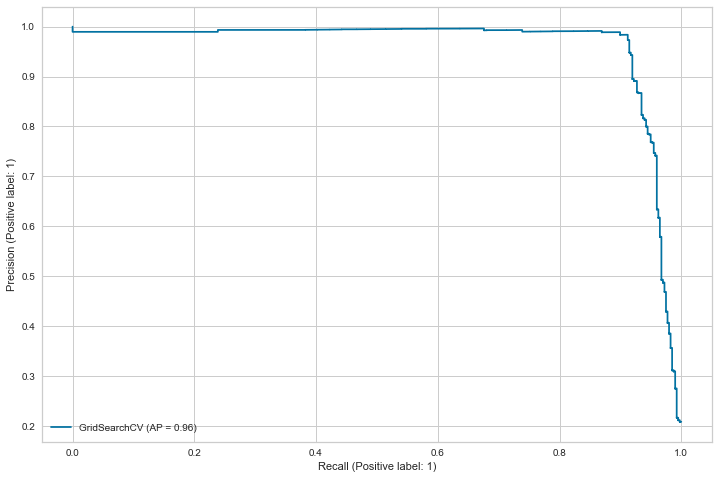

In [167]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);

In [168]:
rf_final_model = Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', random_state=101, max_features=3, max_depth=9))])

In [169]:
rf_final_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])])),

In [170]:
eval_metric(rf_final_model, X_train, y_train, X_test, y_test)

Test_Set
[[1997    4]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.98      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7979   20]
 [  98 1495]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.94      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



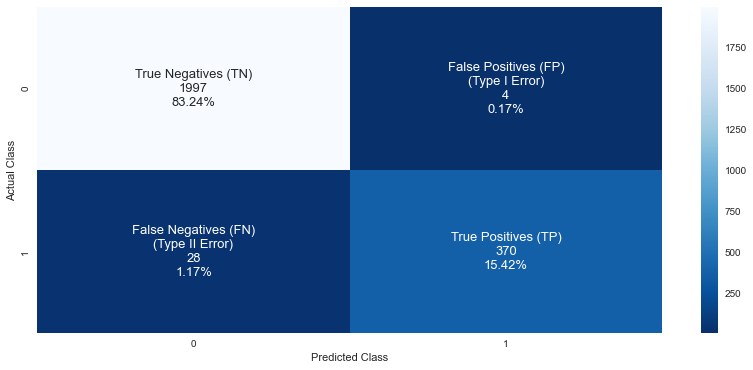

In [171]:
plt.figure(figsize=(14,6))

y_pred = rf_final_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='Blues_r')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

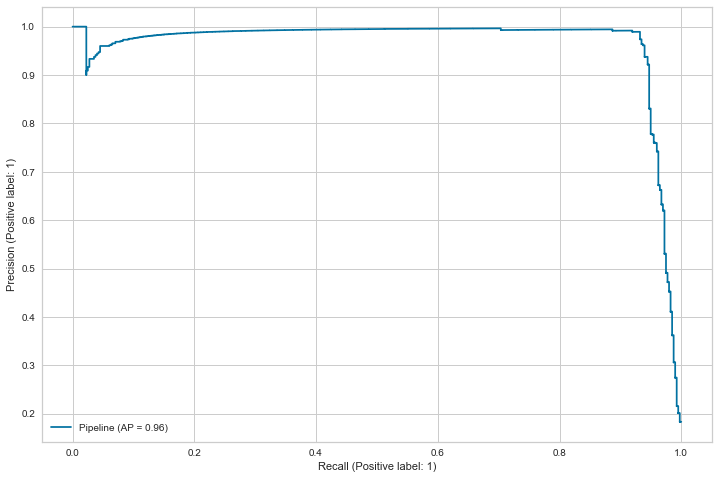

In [172]:
plot_precision_recall_curve(rf_final_model, X_test, y_test);

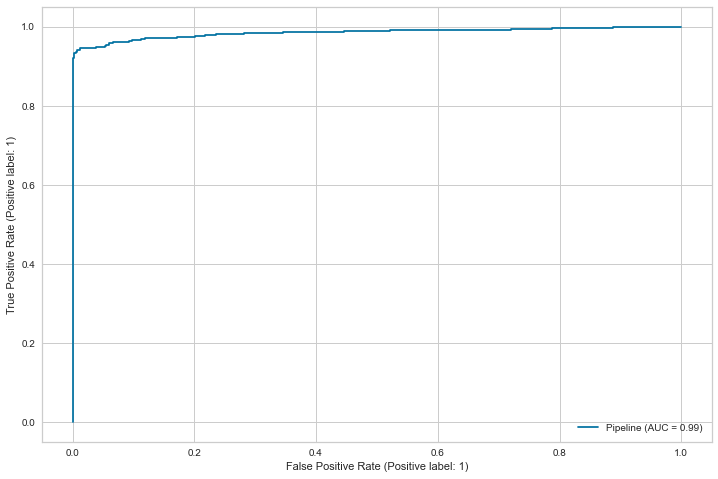

In [173]:
plot_roc_curve(rf_final_model, X_test, y_test);

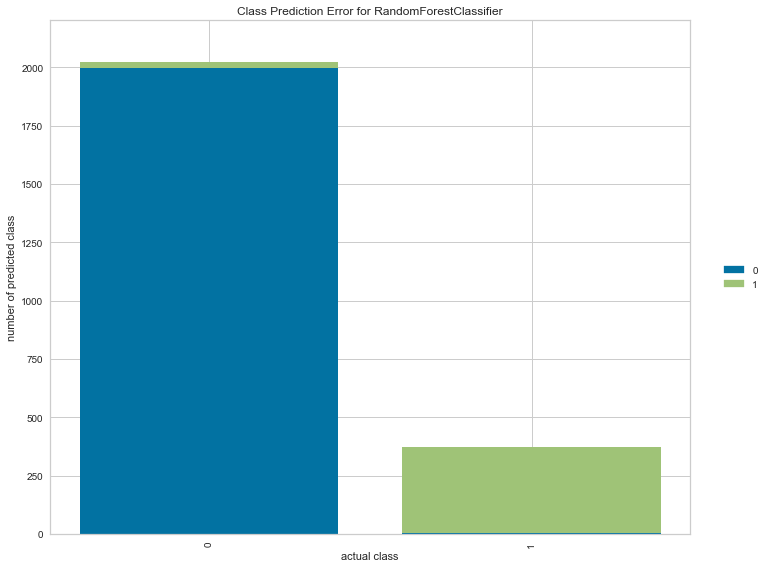

In [174]:
visualizer = ClassPredictionError(rf_final_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

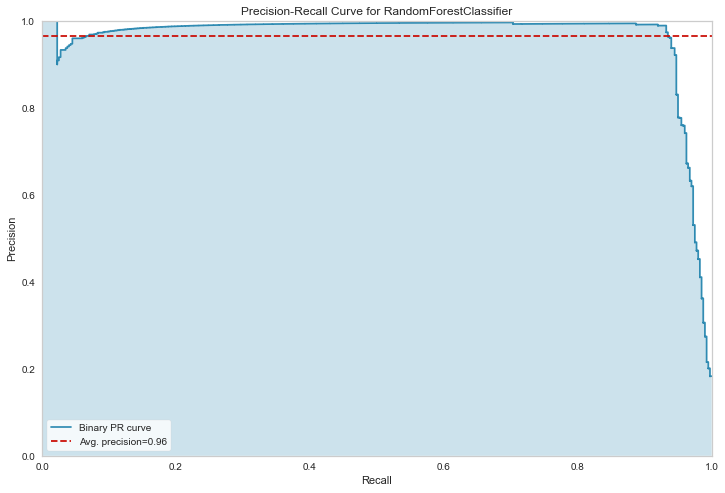

In [175]:
viz = PrecisionRecallCurve(rf_final_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [176]:
y_pred_proba = rf_final_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9647675417888735

In [177]:
# saving scores
y_pred = rf_final_model.predict(X_test)

rf_auc = roc_auc_score(y_test, y_pred,average=None)
rf_f1 = f1_score(y_test, y_pred, average=None)
rf_pre = precision_score(y_test, y_pred, average=None)
rf_recall = recall_score(y_test, y_pred, average=None)

## Feature importances

In [178]:
rf_final_model["randomforestclassifier"].feature_importances_

array([0.00717465, 0.00814454, 0.29168842, 0.13032329, 0.14283749,
       0.15413734, 0.25989166, 0.00549737, 0.00030524])

In [179]:
rf_feature_imp = pd.DataFrame(data = rf_final_model["randomforestclassifier"].feature_importances_, index=X.columns,
                              columns = ["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending = False)
rf_feature_imp

Feature Importance
number_project                   0.291688
promotion_last_5years            0.259892
work_accident                    0.154137
time_spend_company               0.142837
average_montly_hours             0.130323
last_evaluation                  0.008145
satisfaction_level               0.007175
departments                      0.005497
salary                           0.000305

In [180]:
df_rf = df[["number_project","promotion_last_5years","work_accident","left"]]
df_rf.head()

number_project  promotion_last_5years  work_accident  left
0               2                      0              0     1
1               5                      0              0     1
2               7                      0              0     1
3               5                      0              0     1
4               2                      0              0     1

In [181]:
X = df_rf.drop(columns="left")
y = df_rf['left']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [183]:
rf_imp_model = RandomForestClassifier(class_weight='balanced', random_state=101)

In [184]:
rf_imp_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [185]:
eval_metric(rf_imp_model, X_train, y_train, X_test, y_test)

Test_Set
[[1445  556]
 [  55  343]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.83      2001
           1       0.38      0.86      0.53       398

    accuracy                           0.75      2399
   macro avg       0.67      0.79      0.68      2399
weighted avg       0.87      0.75      0.78      2399


Train_Set
[[5864 2135]
 [ 238 1355]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7999
           1       0.39      0.85      0.53      1593

    accuracy                           0.75      9592
   macro avg       0.67      0.79      0.68      9592
weighted avg       0.87      0.75      0.78      9592



#### Prediction

In [186]:
X = df.drop(columns="left")
y = df['left']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [188]:
rf_pred_model = Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=9,
                                        max_features=3, random_state=101))])

In [189]:
rf_pred_model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])])),

### Save the model

In [190]:
pickle.dump(rf_pred_model, open('rf_final_model', 'wb'))

In [191]:
loaded_model = pickle.load(open('rf_final_model', 'rb'))

In [192]:
sample = pd.DataFrame({
        'satisfaction_level': [0.72,0.49,0.75],
        'last_evaluation': [0.54,0.80,0.23],
        'number_project': [3,2,4],
        'average_montly_hours': [158,230,137],
        'time_spend_company': [2,3,5],
        'work_accident': [0,0,1],
        'promotion_last_5years': [0,0,1],
        'departments': ['technical', 'IT', 'sales'],
        'salary': ['medium', 'high', 'low']
    }, index=[0,1,2])

sample

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.72             0.54               3                   158   
1                0.49             0.80               2                   230   
2                0.75             0.23               4                   137   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   2              0                      0   technical   
1                   3              0                      0          IT   
2                   5              1                      1       sales   

   salary  
0  medium  
1    high  
2     low

In [193]:
predictions = loaded_model.predict(sample)
predictions_proba = loaded_model.predict_proba(sample)

In [194]:
sample["pred"] = predictions
sample["pred_proba_1"] = predictions_proba[:,1]
sample["pred_proba_0"] = predictions_proba[:,0]

In [195]:
sample.T

0         1         2
satisfaction_level          0.72      0.49      0.75
last_evaluation             0.54       0.8      0.23
number_project                 3         2         4
average_montly_hours         158       230       137
time_spend_company             2         3         5
work_accident                  0         0         1
promotion_last_5years          0         0         1
departments            technical        IT     sales
salary                    medium      high       low
pred                           0         0         0
pred_proba_1               0.013  0.034355  0.027448
pred_proba_0               0.987  0.965645  0.972552

### #XGBoost Classifier

#### Model Building

In [196]:
X = df.drop(columns="left")
y = df['left']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [198]:
X_train.sample(2)

satisfaction_level  last_evaluation  number_project  \
4548                0.52             0.77               3   
8484                0.74             0.58               4   

      average_montly_hours  time_spend_company  work_accident  \
4548                   142                   2              0   
8484                   178                   4              0   

      promotion_last_5years departments  salary  
4548                      1     support     low  
8484                      0       sales  medium

In [199]:
X_test.sample(2)

satisfaction_level  last_evaluation  number_project  \
829                 0.72             0.95               4   
3162                0.38             0.74               3   

      average_montly_hours  time_spend_company  work_accident  \
829                    220                   5              0   
3162                   159                   4              0   

      promotion_last_5years  departments  salary  
829                       0  product_mng     low  
3162                      0    technical  medium

In [200]:
preprocessor = ColumnTransformer(transformers=[
    ('encoder_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']],
                                       handle_unknown='use_encoded_value', unknown_value=-1), ['salary']),
    ('encoder_nominal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['departments'])], 
                                 remainder='passthrough')

In [201]:
xgb = XGBClassifier(random_state=101, eval_metric='logloss')

In [202]:
xgb_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('xgb_model', xgb)])

In [203]:
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])])),
    

In [204]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[1988   13]
 [  27  371]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.97      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7995    4]
 [  31 1562]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.98      0.99      1593

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592



In [205]:
model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('xgb_model', xgb)])

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                            'f1', 'roc_auc'], cv = 10, return_train_score=True
                                                             )
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.981756
train_accuracy     0.997000
test_precision     0.974726
train_precision    0.997386
test_recall        0.914037
train_recall       0.984516
test_f1            0.943243
train_f1           0.990908
test_roc_auc       0.982226
train_roc_auc      0.999956
dtype: float64

In [206]:
# there s no overfitting.

In [207]:
# GRID SEARCH

model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('xgb_model', xgb)])

param_grid = {'xgb_model__colsample_bytree': [0.7, 0.9, 1],
 'xgb_model__learning_rate': [0.01, 0.02],
 'xgb_model__max_depth': [4, 6],
 'xgb_model__n_estimators': [3,5],
 'xgb_model__subsample': [0.8, 0.9, 1]}

xgb_grid_model = GridSearchCV(model, param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)

In [208]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.59957495, 3.01067169])

In [209]:
xgb_grid_model.fit(X_train, y_train, xgb_model__sample_weight=classes_weights)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder_ordinal',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary']),
                                                                        ('encoder_nominal',
           

In [210]:
xgb_grid_model.best_params_

{'xgb_model__colsample_bytree': 1,
 'xgb_model__learning_rate': 0.01,
 'xgb_model__max_depth': 4,
 'xgb_model__n_estimators': 5,
 'xgb_model__subsample': 1}

In [211]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])])),
    

In [212]:
xgb_grid_model.best_score_

0.9365883953392086

In [213]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1866  135]
 [  19  379]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2001
           1       0.74      0.95      0.83       398

    accuracy                           0.94      2399
   macro avg       0.86      0.94      0.90      2399
weighted avg       0.95      0.94      0.94      2399


Train_Set
[[7406  593]
 [  96 1497]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7999
           1       0.72      0.94      0.81      1593

    accuracy                           0.93      9592
   macro avg       0.85      0.93      0.88      9592
weighted avg       0.94      0.93      0.93      9592



In [214]:
xgb_final_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('xgb_model', XGBClassifier(colsample_bytree= 0.9,
                                 learning_rate= 0.01,
                                 max_depth= 8,
                                 n_estimators= 5,
                                 subsample= 1, eval_metric='logloss'))])

In [215]:
xgb_final_model.fit(X_train, y_train, xgb_model__sample_weight=classes_weights)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])])),
    

In [216]:
eval_metric(xgb_final_model, X_train, y_train, X_test, y_test)

Test_Set
[[1965   36]
 [  25  373]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2001
           1       0.91      0.94      0.92       398

    accuracy                           0.97      2399
   macro avg       0.95      0.96      0.95      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7923   76]
 [  86 1507]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7999
           1       0.95      0.95      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.97      0.97      0.97      9592
weighted avg       0.98      0.98      0.98      9592



#### Evaluating Model Performance and Tuning

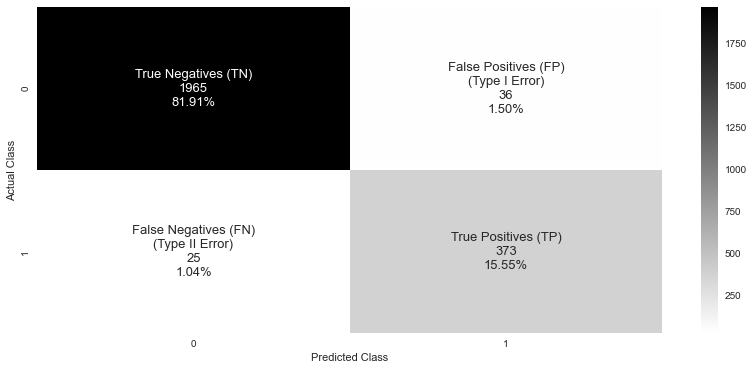

In [217]:
plt.figure(figsize=(14,6))

y_pred = xgb_final_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='binary')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

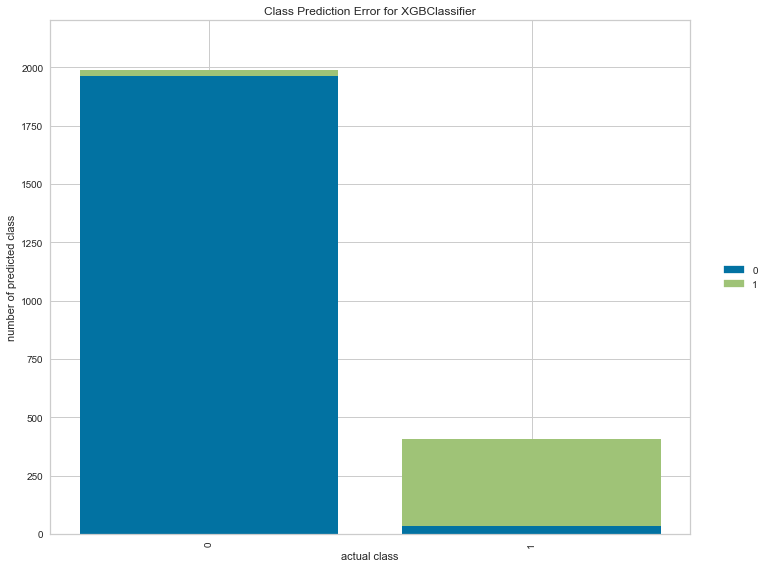

In [218]:
visualizer = ClassPredictionError(xgb_final_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

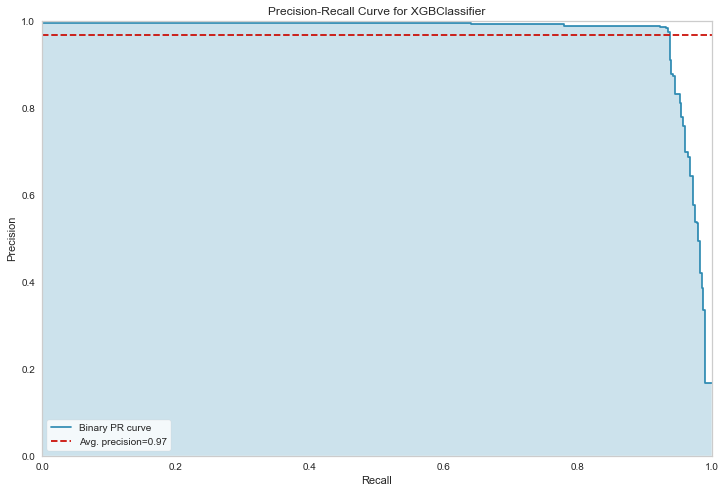

In [219]:
viz = PrecisionRecallCurve(xgb_final_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

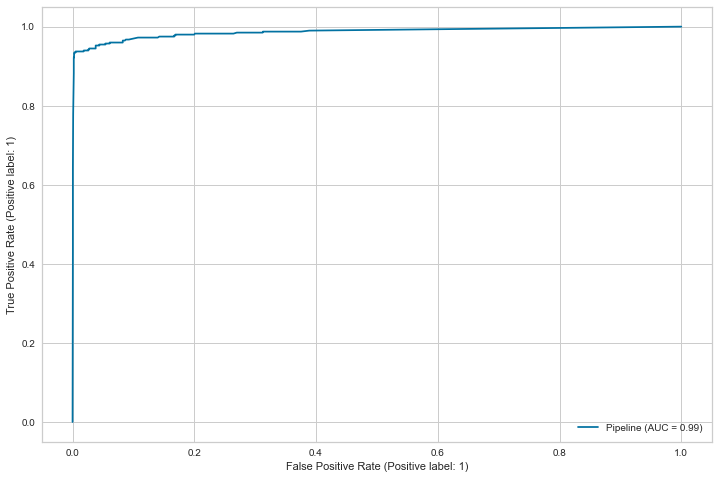

In [220]:
plot_roc_curve(xgb_final_model, X_test, y_test);

In [221]:
y_pred_proba = xgb_final_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9684221406058976

In [222]:
# saving scores
y_pred = xgb_final_model.predict(X_test)

xgb_auc = roc_auc_score(y_test, y_pred,average=None)
xgb_f1 = f1_score(y_test, y_pred, average=None)
xgb_pre = precision_score(y_test, y_pred, average=None)
xgb_recall = recall_score(y_test, y_pred, average=None)

#### Prediction

In [223]:
xgb_pred_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('xgb_model', XGBClassifier(colsample_bytree= 0.9,
                                 learning_rate= 0.01,
                                 max_depth= 8,
                                 n_estimators= 5,
                                 subsample= 1, eval_metric='logloss'))])

In [224]:
xgb_pred_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])])),
    

### Save the model

In [225]:
pickle.dump(xgb_pred_model, open('xgb_final_model', 'wb'))

In [226]:
loaded_model = pickle.load(open('xgb_final_model', 'rb'))

In [227]:
sample = pd.DataFrame({
        'satisfaction_level': [0.72,0.49,0.75],
        'last_evaluation': [0.54,0.80,0.23],
        'number_project': [3,2,4],
        'average_montly_hours': [158,230,137],
        'time_spend_company': [2,3,5],
        'work_accident': [0,0,1],
        'promotion_last_5years': [0,0,1],
        'departments': ['technical', 'IT', 'sales'],
        'salary': ['medium', 'high', 'low']
    }, index=[0,1,2])

sample

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.72             0.54               3                   158   
1                0.49             0.80               2                   230   
2                0.75             0.23               4                   137   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   2              0                      0   technical   
1                   3              0                      0          IT   
2                   5              1                      1       sales   

   salary  
0  medium  
1    high  
2     low

In [228]:
predictions = loaded_model.predict(sample)

In [229]:
sample["pred"] = predictions

In [230]:
sample

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.72             0.54               3                   158   
1                0.49             0.80               2                   230   
2                0.75             0.23               4                   137   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   2              0                      0   technical   
1                   3              0                      0          IT   
2                   5              1                      1       sales   

   salary  pred  
0  medium     0  
1    high     0  
2     low     0

In [231]:
sample2 = df.sample(5)

In [232]:
actual = sample2["left"]
sample2 = sample2.drop("left",axis=1)

In [233]:
predictions2 = loaded_model.predict(sample2)

In [234]:
sample2["pred"] = predictions2

sample2["actual"] = actual

In [235]:
sample2.T

3786    1125    6357         2044   623 
satisfaction_level          0.17     0.1     0.6         0.41   0.38
last_evaluation             0.88    0.85    0.91         0.68    0.5
number_project                 6       7       3            3      2
average_montly_hours         226     261     157          165    140
time_spend_company             3       4       4            3      3
work_accident                  1       0       0            1      0
promotion_last_5years          0       0       0            0      0
departments            technical      IT      hr  product_mng  sales
salary                      high  medium  medium       medium    low
pred                           0       1       0            0      1
actual                         0       1       0            0      1

### #ANN Classifier

#### Layer Architecture Building and Compiling

In [302]:
df_ann = df_enc.copy()
df_ann.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  departments  \
0                   3              0                      0            7   
1                   6              0                      0            7   
2                   4              0                      0            7   
3                   5              0                      0            7   
4                   3              0                      0            7   

   salary  left  
0     0.0     1  
1     1.0     1  
2     1.0     1  
3     0.0     1  
4     0.0     1

In [237]:
df_ann.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [238]:
X = df_ann.drop('left', axis=1)
y = df_ann['left']

In [239]:
seed = 42

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = seed)

In [241]:
scaler = MinMaxScaler()

In [242]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [243]:
X_train.shape, X_test.shape

((9592, 9), (2399, 9))

In [244]:
tf.random.set_seed(seed)

ann_model = Sequential()

ann_model.add(Dense(128, activation = "relu", input_dim = X_train.shape[1]))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(64, activation = "relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(32, activation = "relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(16, activation = "relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(8, activation = "relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(4, activation = "relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(1, activation = "sigmoid"))

In [245]:
optimizer = Adam(learning_rate=0.005)

In [246]:
ann_model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [247]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [248]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",
                           verbose=1, patience = 15, restore_best_weights=True)

In [249]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.59957495, 3.01067169])

In [250]:
ann_model.fit(X_train, y_train, epochs=1000, batch_size=64, sample_weight=classes_weights,
              validation_data=(X_test, y_test), callbacks = [early_stop])

Epoch 1/1000
150/150 [==============================] - 2s 6ms/step - loss: 0.5721 - recall: 0.7897 - val_loss: 0.3366 - val_recall: 0.9598
Epoch 2/1000
150/150 [==============================] - 1s 5ms/step - loss: 0.4647 - recall: 0.9404 - val_loss: 0.3363 - val_recall: 0.9322
Epoch 3/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.3927 - recall: 0.9190 - val_loss: 0.2156 - val_recall: 0.9347
Epoch 4/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.3533 - recall: 0.9284 - val_loss: 0.3135 - val_recall: 0.9523
Epoch 5/1000
150/150 [==============================] - 1s 5ms/step - loss: 0.3317 - recall: 0.9253 - val_loss: 0.2735 - val_recall: 0.9523
Epoch 6/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.3166 - recall: 0.9240 - val_loss: 0.2300 - val_recall: 0.9347
Epoch 7/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.2975 - recall: 0.9203 - val_loss: 0.1630 - val_recall: 0.9196
Epoch 8/1000
150/150

#### Evaluating Model Performance and Tunning

In [251]:
loss_df = pd.DataFrame(ann_model.history.history)
loss_df.head()

loss    recall  val_loss  val_recall
0  0.572125  0.789705  0.336608    0.959799
1  0.464704  0.940364  0.336344    0.932161
2  0.392741  0.919021  0.215641    0.934673
3  0.353321  0.928437  0.313478    0.952261
4  0.331708  0.925298  0.273476    0.952261

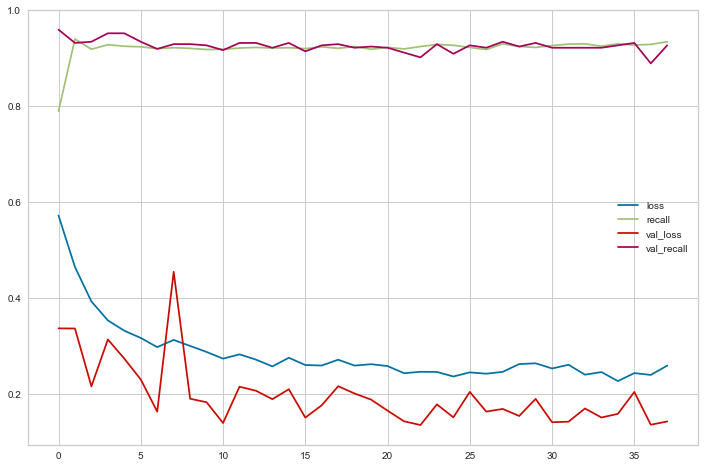

In [252]:
loss_df.plot();

In [253]:
ann_model.evaluate(X_test, y_test, verbose=0)

[0.13493765890598297, 0.9020100235939026]

In [254]:
y_pred = ann_model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

75/75 [==============================] - 0s 2ms/step
[[1946   55]
 [  39  359]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.87      0.90      0.88       398

    accuracy                           0.96      2399
   macro avg       0.92      0.94      0.93      2399
weighted avg       0.96      0.96      0.96      2399



In [255]:
y_train_pred = ann_model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

300/300 [==============================] - 1s 3ms/step
[[7806  193]
 [ 145 1448]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.91      0.90      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.94      0.94      9592
weighted avg       0.97      0.96      0.96      9592



75/75 [==============================] - 0s 2ms/step


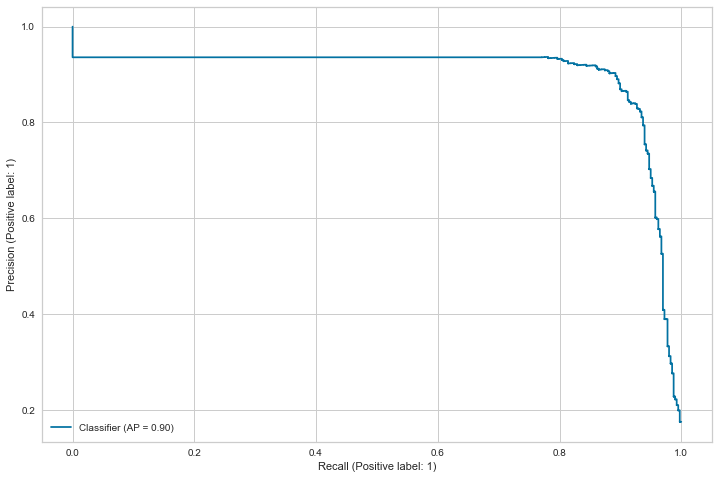

In [256]:
y_pred_proba = ann_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [257]:
average_precision_score(y_test, y_pred_proba)

0.9019308208856629

In [258]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dense(units = 64, activation = 'relu'))
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ["Recall"])
    return classifier

In [259]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 5, restore_best_weights = True)

In [260]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_data=(X_test, y_test), epochs = 50)

parameters = {'batch_size': [64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], sample_weight=classes_weights)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Epoch 1/50
75/75 [==============================] - 2s 6ms/step - loss: 0.6108 - recall: 0.5656 - val_loss: 0.4162 - val_recall: 0.8442
Epoch 2/50
75/75 [==============================] - 0s 3ms/step - loss: 0.3565 - recall: 0.8933 - val_loss: 0.3067 - val_recall: 0.9422
Epoch 3/50
75/75 [==============================] - 0s 3ms/step - loss: 0.2348 - recall: 0.9259 - val_loss: 0.1801 - val_recall: 0.9322
Epoch 4/50
75/75 [==============================] - 0s 3ms/step - loss: 0.2022 - recall: 0.9272 - val_loss: 0.1730 - val_recall: 0.9347
Epoch 5/50
75/75 [==============================] - 0s 4ms/step - loss: 0.1903 - recall: 0.9222 - val_loss: 0.2039 - val_recall: 0.9322
Epoch 6/50
75/75 [==============================] - 0s 3ms/step - loss: 0.1819 - recall: 0.9247 - val_loss: 0.1382 - val_recall: 0.9171
Epoch 7/50
75/75 [==============================] - 0s 3ms/step - loss: 0.1768 - recall: 0.9222 - val_loss: 0.1402 - val_re

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001BD067FE800>,
             n_jobs=-1,
             param_grid={'batch_size': [64, 128], 'learn_rate': [0.001, 0.003],
                         'optimizer': [<class 'keras.optimizers.optimizer_experimental.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [261]:
grid_model.best_score_

0.9085536582633431

In [262]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_experimental.adam.Adam}

In [263]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
8          0.908554        0.011510                1   
4          0.906255        0.013837                2   
3          0.904200        0.011871                3   
15         0.903281        0.014163                4   
11         0.903008        0.008775                5   
5          0.899935        0.019069                6   
13         0.899140        0.011671                7   
0          0.898999        0.022214                8   
12         0.897731        0.023912                9   
7          0.894235        0.009579               10   
9          0.891785        0.020726               11   
1          0.880363        0.012931               12   
2          0.781333        0.224205               13   
10         0.626895        0.379275               14   
6          0.572098        0.373979               15   
14         0.434804        0.360353               16   

                                               params  
8   {'batch_size': 128, 'learn_rate': 0.001, 'opti...  
4   {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
3   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
15  {'batch_size': 128, 'learn_rate': 0.003, 'opti...  
11  {'batch_size': 128, 'learn_rate': 0.001, 'opti...  
5   {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
13  {'batch_size': 128, 'learn_rate': 0.003, 'opti...  
0   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
12  {'batch_size': 128, 'learn_rate': 0.003, 'opti...  
7   {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
9   {'batch_size': 128, 'learn_rate': 0.001, 'opti...  
1   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
2   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
10  {'batch_size': 128, 'learn_rate': 0.001, 'opti...  
6   {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
14  {'batch_size': 128, 'learn_rate': 0.003, 'opti...

In [264]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

75/75 [==============================] - 0s 1ms/step
[[1950   51]
 [  30  368]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.88      0.92      0.90       398

    accuracy                           0.97      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399



In [265]:
y_train_pred = grid_model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

300/300 [==============================] - 1s 2ms/step
[[7776  223]
 [ 123 1470]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7999
           1       0.87      0.92      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.95      0.94      9592
weighted avg       0.97      0.96      0.96      9592



75/75 [==============================] - 0s 2ms/step


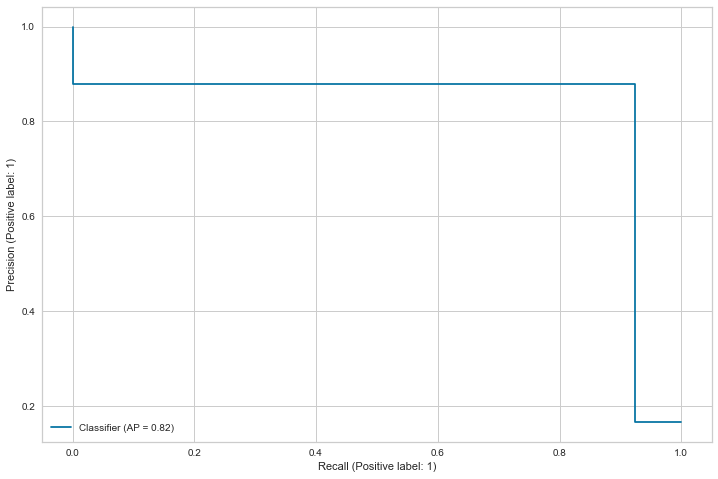

In [266]:
y_pred_proba = grid_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [267]:
# saving best scores
y_pred = ann_model.predict(X_test) >= 0.5

ann_auc = roc_auc_score(y_test, y_pred,average=None)
ann_f1 = f1_score(y_test, y_pred, average=None)
ann_pre = precision_score(y_test, y_pred, average=None)
ann_recall = recall_score(y_test, y_pred, average=None)

75/75 [==============================] - 0s 1ms/step


### Save the model

In [268]:
ann_model.save('ann_model.h5') #best model

In [269]:
pickle.dump(scaler, open("scaler_employee", 'wb'))

#### Prediction

In [270]:
model_ann = load_model('ann_model.h5')
scaler_ann = pickle.load(open("scaler_employee", "rb"))

In [271]:
five_employers = df_ann.drop('left', axis = 1).iloc[0:5, :]
five_employers

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  departments  \
0                   3              0                      0            7   
1                   6              0                      0            7   
2                   4              0                      0            7   
3                   5              0                      0            7   
4                   3              0                      0            7   

   salary  
0     0.0  
1     1.0  
2     1.0  
3     0.0  
4     0.0

In [272]:
five_employers = scaler_ann.transform(five_employers)
five_employers

array([[0.31868132, 0.265625  , 0.        , 0.28504673, 0.125     ,
        0.        , 0.        , 0.77777778, 0.        ],
       [0.78021978, 0.78125   , 0.6       , 0.77570093, 0.5       ,
        0.        , 0.        , 0.77777778, 0.5       ],
       [0.02197802, 0.8125    , 1.        , 0.82242991, 0.25      ,
        0.        , 0.        , 0.77777778, 0.5       ],
       [0.69230769, 0.796875  , 0.6       , 0.59345794, 0.375     ,
        0.        , 0.        , 0.77777778, 0.        ],
       [0.30769231, 0.25      , 0.        , 0.29439252, 0.125     ,
        0.        , 0.        , 0.77777778, 0.        ]])

In [273]:
(model_ann.predict(five_employers) > 0.5).astype("int32")

1/1 [==============================] - 0s 78ms/step


array([[1],
       [1],
       [1],
       [1],
       [1]])

In [274]:
df_ann["left"].iloc[0:5]

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

## Models Comparing

In [275]:
compare = pd.DataFrame({"Model": ["K-Neighbors", "Random Forest", "XGBoost", "ANN"],
                        
                        "F1_Score": [knn_f1[1], rf_f1[1], xgb_f1[1], ann_f1[1]],
                        
                        "Recall_Score": [knn_recall[1], rf_recall[1], xgb_recall[1], ann_recall[1]],
                        
                        "Precision_Score": [knn_pre[1], rf_pre[1], xgb_pre[1], ann_pre[1]],
                       
                        "ROC_AUC_Score": [knn_auc, rf_auc, xgb_auc, ann_auc]})

In [276]:
compare

Model  F1_Score  Recall_Score  Precision_Score  ROC_AUC_Score
0    K-Neighbors  0.882571      0.890274         0.875000       0.932374
1  Random Forest  0.958549      0.929648         0.989305       0.963825
2        XGBoost  0.924411      0.937186         0.911980       0.959597
3            ANN  0.884236      0.902010         0.867150       0.937262

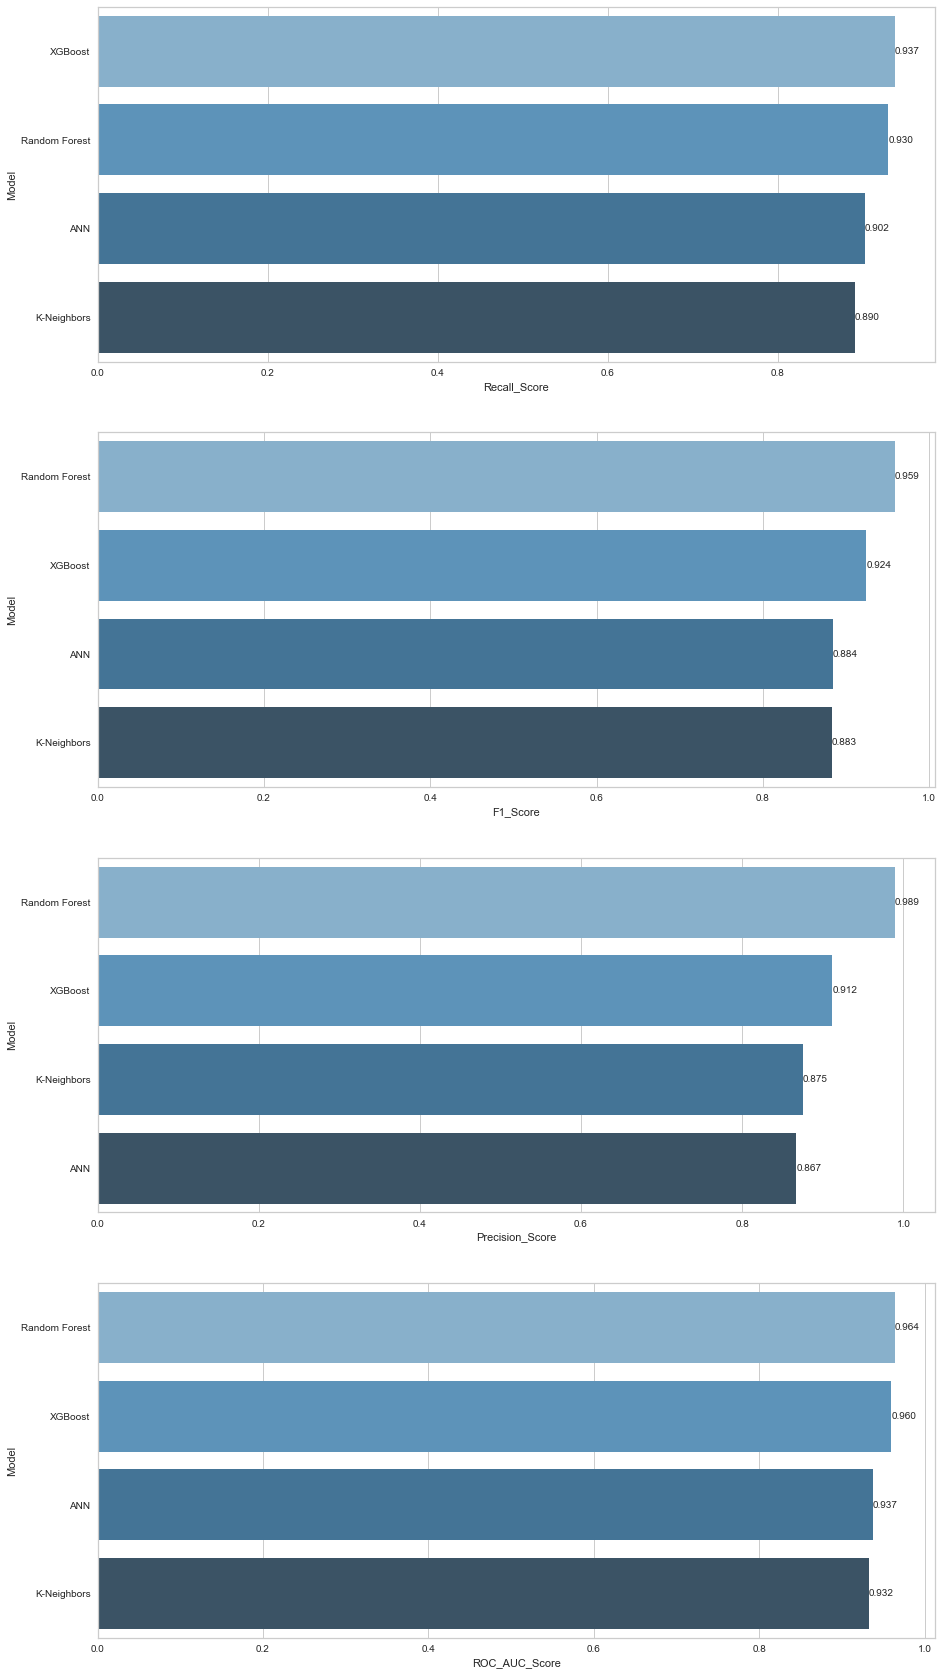

In [277]:
plt.figure(figsize=(15,30))

plt.subplot(411)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(412)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(413)
compare = compare.sort_values(by="Precision_Score", ascending=False)
ax=sns.barplot(x="Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

In [316]:
df_final = df_enc.copy()

In [317]:
X = df_final.drop(columns="left")
y = df_final['left']

In [318]:
final_model = RandomForestClassifier(class_weight='balanced', random_state=101, max_features=3, max_depth=9)

In [319]:
final_model.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=3,
                       random_state=101)

In [320]:
pickle.dump(final_model, open("final_RF_pipe_model", 'wb'))

### Save and Export Variables


In [303]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      0       sales   
2                   4              0                      0       sales   
3                   5              0                      0       sales   
4                   3              0                      0       sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [304]:
df.to_csv('HR_final.csv')

___

<p style="text-align: center;"><img src="https://www.aihr.com/wp-content/uploads/High-employee-turnover.jpg" class="img-fluid" alt="CLRSWY"></p>

___